## 1. Import Basic Library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.Import necessary libraries

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,MinMaxScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split,ShuffleSplit,cross_validate,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score as ac
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay

## 3. Data loading and visualization and preprocessing

### 3.1 Load the data

In [3]:
train_data=pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv")

In [4]:
print("Train data shape:",train_data.shape)

Train data shape: (13636, 15)


In [5]:
test_data=pd.read_csv("/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv")

In [6]:
print("Test data shape",test_data.shape)

Test data shape (4546, 14)


### 3.2 Perfrom EDA and data visualization

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


#### 3.2.1 Check missing vlaue/ null value.

In [8]:
train_data.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

In [9]:
train_data.dropna(inplace=True)

Observation:

There are only 2 null value in recipe_review column.

In [10]:
# print dimension of train_data
train_data.shape

(13634, 15)

In [11]:
# For numerical column
train_data.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13634.00000,13634.000000,13634.000000,13634.000000,1.363400e+04,13634.000000,13634.000000,13634.000000,13634.000000,13634.00000
mean,121.05589,38.629382,21787.406117,2.160481,1.623714e+09,0.014523,1.098430,0.543788,4.288617,153.13569
std,116.97871,29.671643,23884.389851,10.087154,5.444406e+06,0.137333,4.166771,3.265893,1.544928,140.99578
min,0.00000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.00000
25%,45.00000,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.00000
50%,91.00000,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.00000
75%,148.00000,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.00000
max,724.00000,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.00000


In [12]:
# For categorical column
train_data.describe(include="object")

,RecipeName,CommentID,UserID,UserName,Recipe_Review
count,13634,13634,13634,13634,13634
unique,100,13634,10782,10619,13370
top,Cheeseburger Soup,sp_aUSaElGf_12259_c_149978,u_1oKVZoIOMWJ2j7TA7py2BIbf1mm,mjlouk,Delicious!
freq,552,1,20,21,12


Observation:
1.   There are 13636 rows and 15 columns in training data.
2.   There are 10 colums having data type int64 and 5 columns having data type object.

3.   In recipeName cheeseburger Soup have highest frequency, In UserName mjlouk have highest frequency and In recipe_review Delicious! word have highest frequency.








### 3.3Columns/Attributes

### 1. ID

In [13]:
print("Unique value:", pd.unique(train_data["ID"]))
print("No.of distnict values:", len(pd.unique(train_data["ID"])))

Unique value: [ 70  72 458   7  60  36  96  59 179 702  22  83  34 106  76  61  92  44
 390 351 157   4  53 134 343 251 132 127  66  42  79 222   5 131 118  90
  95  23  40  77 142  58 114 119 112  73  84 138 414  13  57 125 321  46
 195  43  29 533 233  62 494 161  25  19  68 271 104  67  65 283  54   2
  74  80 105  88 287  78  11   8 117 346 137  97  93 231 113 110 158 153
 108  56  17 147 574 370 212  52  51 141 162  37 294 173 128   1  48  98
 415 149  55  99 150   0 225  39 197  47 521  35  33 136  45  10 201 180
 589 129 185  15 261 476  49  31 135 418 313  50  71 192 145 317 182 168
  12 420 199 216  21 188 345 115 238 166  18  63 101 140  16  82 368 357
 160  41  94 107 353  27 610 217 504 350 174 170 183 152   6 280 267  14
 247  38  81 549 326  28 194 248 139 286 277 100 175 156 330   9 650  69
  26  86 155 146 144 318 120 122 297 660  32 133 202 151   3 143 303 569
 275 124 355 116  24 423 148 316 493 272  20  85  75 200 615 209 614  91
 706 260 431 539 311 234  87 347 219 

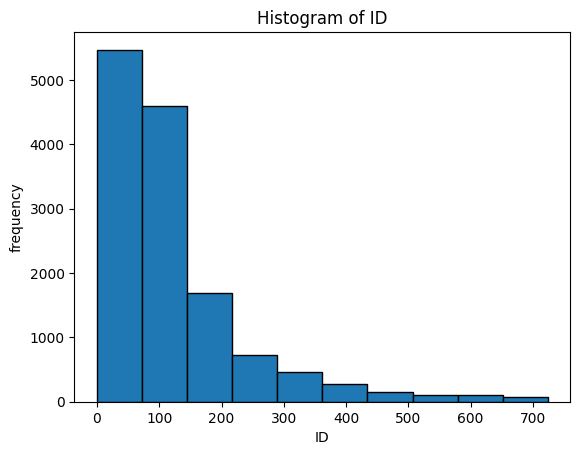

In [14]:
# To plot histogram.
plt.hist(train_data["ID"], bins=10,ec="black")
plt.xlabel("ID")
plt.ylabel("frequency")
plt.title("Histogram of ID")
plt.show()

Observation:

1.  There are 701 unique vlaue in ID colum.
2.  ID number 0 to 100 have highest frequency.
3.  Data-Distribution is right-skewed.



### 2. Recipe Number

In [15]:
print("Unique value:", pd.unique(train_data["RecipeNumber"]))
print("No.of distnict values:", len(pd.unique(train_data["RecipeNumber"])))

Unique value: [ 71  88   3  50  12   6  17  32  28  86  40  42  62  56  15  67   7   9
   1  18  59  63  89  46  13  14  30  82  73  31  33  64   5  39  76  94
  96  29  69  65  84  26  91  34  93  54   8  57   4  70  36  21  60  75
  10   2  44  85  49  79  83  24  47  16  45  97  48  23  55  38  58  98
  61  52  11  20  35  41  90  78  80  43  81  99  77 100  74  19  27  53
  22  68  92  87  37  95  66  25  51  72]
No.of distnict values: 100


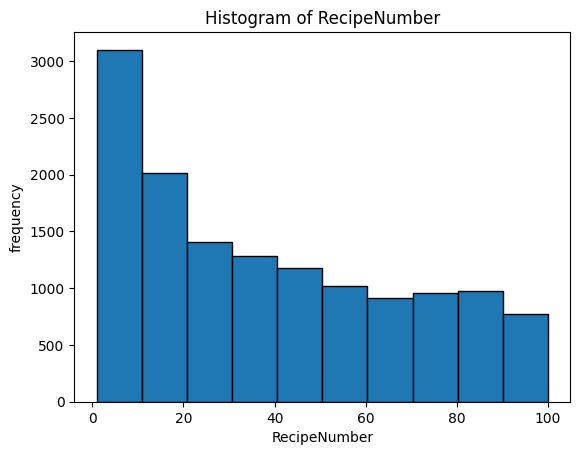

In [16]:
# To plot histogram.
plt.hist(train_data["RecipeNumber"], bins=10, ec="black")
plt.xlabel("RecipeNumber")
plt.ylabel("frequency")
plt.title("Histogram of RecipeNumber")
plt.show()

Observations:
1.   There are 100 distnict Recipenumber given to Recipe.
2.   Recipe number between 0 to 10 have highest frequency.
3.   The data-distribution is right-skewed.



### 3. Recipe Code.

In [17]:
print("Unique value:", pd.unique(train_data["RecipeCode"]))
print("No.of distnict values:", len(pd.unique(train_data["RecipeCode"])))

Unique value: [ 12259   8202   2832 100276  19731  21444  36450  17310  12734   4383
   8431  10248   1152  27675  10252  16579  12540  42083  14299   2872
    414  24886   1324  18345  32480   7178  39549  18274  41095   7708
  32535  12700  42386  28058  46655   8015   3290   3058  39545  12347
   4444    386   3683  19201  42873  35766   6086   9010  17826  32264
   1196  33206  11588  38183   2912   3309  31278  39334  45495  33121
   9735    957  15805  41101  41384  34347   9739  14600  38550   1063
  32248  11767  17022  27434  12003   6504  27696  35948  33743  36217
  39581  33457  27626 191775  16458  82745  26937   1693  43675   3143
   1081  74724 141947  11330  20170  18341   7752  23222   7539   1821]
No.of distnict values: 100


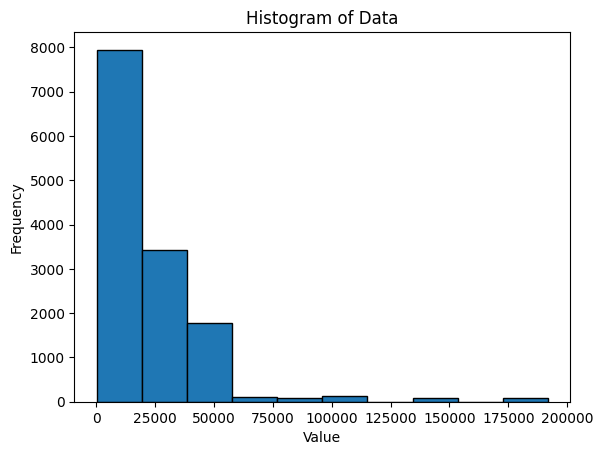

In [18]:
# To plot histogram.
plt.hist(train_data["RecipeCode"], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()

Observation:
1.  There are 100 unique values in Recipe code.
2.  The Data-distribution is right-skewed.

### 4.RecipeName

In [19]:
recipe_frequency = train_data['RecipeName'].value_counts()
recipe_frequency

RecipeName
Cheeseburger Soup             552
Creamy White Chili            483
Best Ever Banana Bread        372
Enchilada Casser-Ole!         313
Basic Homemade Bread          307
                             ... 
Cheeseburger Paradise Soup     68
Lime Chicken Tacos             65
Caramel Heavenlies             64
Blueberry French Toast         64
Vegetarian Linguine            19
Name: count, Length: 100, dtype: int64

In [20]:
print("No.of distnict values:", len(pd.unique(train_data["RecipeName"])))

No.of distnict values: 100


Observation:


1.   There are 100 distinct values in recipeName.
2.   Cheeseburger Soup have highest frequency and Vegetarian Linuguine have lowest frequency.



### 5.comment ID

In [21]:
print("No.of distnict values:", len(pd.unique(train_data["RecipeCode"])))

No.of distnict values: 100


In [22]:
Comment = train_data['CommentID'].value_counts()
Comment

CommentID
sp_aUSaElGf_12259_c_149978    1
sp_aUSaElGf_957_c_309588      1
sp_aUSaElGf_2832_c_402836     1
sp_aUSaElGf_46655_c_187738    1
sp_aUSaElGf_8431_c_117947     1
                             ..
sp_aUSaElGf_12540_c_399046    1
sp_aUSaElGf_2832_c_353998     1
sp_aUSaElGf_14299_c_115297    1
sp_aUSaElGf_32480_c_401820    1
sp_aUSaElGf_2832_c_278956     1
Name: count, Length: 13634, dtype: int64

Observation:
1. There are 100 unique commentID present in column ID.


### 6.UserID

In [23]:
print("Unique value:",pd.unique(train_data["UserID"]))
print("No.of distnict values:",len(pd.unique(train_data["UserID"])))

Unique value: ['u_1oKVaBmiEKwAFyiHrDLoWpbel0J' 'u_1oKZeRIXYzGNhGW8OMR3O4lX1ih'
 'u_1oKYHUtdaD48KJCDYq5wfpAUxWz' ... 'u_1oKbGr5o9tj0mQl1rkVqzWnE481'
 'u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW' 'u_1oKYPsERQ0GvUcjIsuAxzmnsQGW']
No.of distnict values: 10782


In [24]:
userID = train_data['UserID'].value_counts()
userID

UserID
u_1oKVZoIOMWJ2j7TA7py2BIbf1mm    20
u_1oKVZmYPulmUFbvGiBA8U3uRR6D    18
u_1oKVZdmUbQTYMVdbXOpVfRQuHm9    18
u_1oKVZzipo1u8lcqQzDUcw4UBn9e    17
u_1oKVZxAOR5BEzyF4H6ENc7jwfUW    15
                                 ..
u_1oKVZxIEpxZK4aMX9iupGYVUt0N     1
u_1oKc6ewGuQpQ5S6fVjKWZ1d95es     1
u_1oKYgSIJsryLqQ58dRqEExsvxmg     1
u_1oKVyKEZexVYmasyrzDQO3t5XB7     1
u_1oKYPsERQ0GvUcjIsuAxzmnsQGW     1
Name: count, Length: 10782, dtype: int64

Observation:

1.   There are 10783 distinct userID out of 13636.
2.   User_id u_1oKVZoIOMWJ2j7TA7py2BIbf1mm have highest frequency.





### 7.UserReputation

In [25]:
print("Unique value:",pd.unique(train_data["UserReputation"]))
print("No.of distnict values:",len(pd.unique(train_data["UserReputation"])))
print("Mininum value in User reputation",train_data["UserReputation"].min())
print("Maximum value in User reputation", train_data["UserReputation"].max())

Unique value: [ 20   1  10  80  30   0  60  90 160  40 510 100  50 140  70 220 110 130
 150 300]
No.of distnict values: 20
Mininum value in User reputation 0
Maximum value in User reputation 510


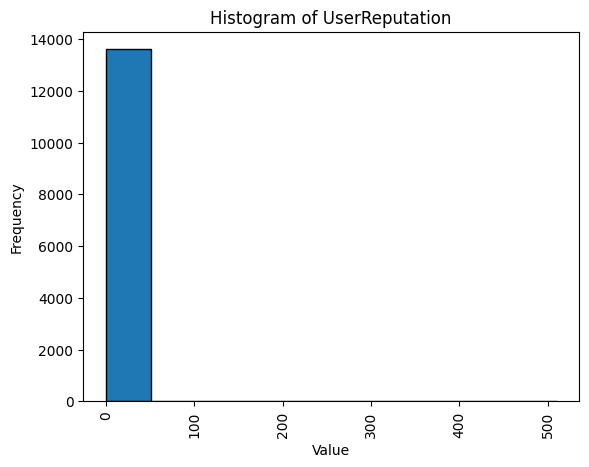

In [26]:
# To plot histogram.
plt.hist(train_data["UserReputation"],edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of UserReputation')
plt.xticks(rotation='vertical')
plt.show()

Observation:


1.   There are 20 unique value in UserReputation.
2.   max value of UserReputation is 510 and min vlaue of UserReputation is 0.



### 8.CreationTimestamp

In [27]:
print("Unique value:",pd.unique(train_data["CreationTimestamp"]))
print("No.of distnict values:",len(pd.unique(train_data["CreationTimestamp"])))

Unique value: [1622717078 1622717852 1622717357 ... 1640442551 1625948900 1645402286]
No.of distnict values: 2422


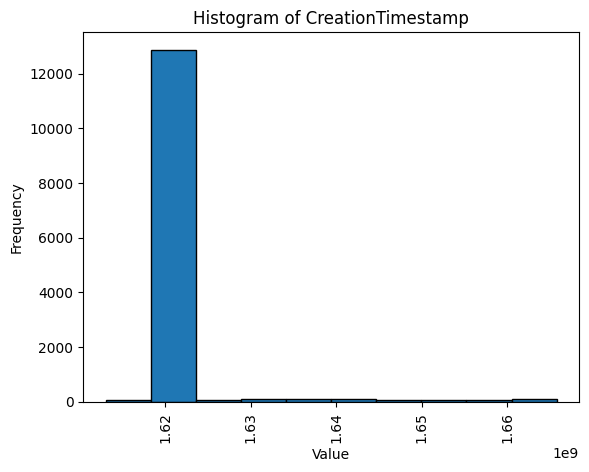

In [28]:
# To plot histogram.
plt.hist(train_data["CreationTimestamp"], bins=10, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of CreationTimestamp')
plt.xticks(rotation='vertical')
plt.show()

Observations:

1. There are 2422 unique values present in CreationTimeStamp.

### 9.Reply count

In [29]:
print("Unique value:", pd.unique(train_data["ReplyCount"]))
print("No.of distnict values:", len(pd.unique(train_data["ReplyCount"])))

Unique value: [0 1 2 3]
No.of distnict values: 4


In [30]:
train_data["ReplyCount"].value_counts()

ReplyCount
0    13462
1      151
2       16
3        5
Name: count, dtype: int64

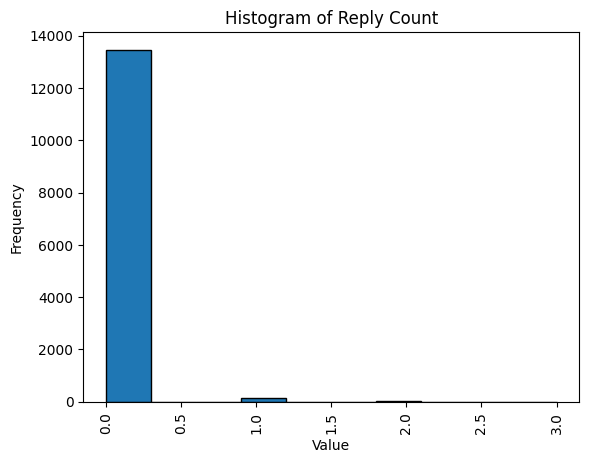

In [31]:
# To plot histogram.
plt.hist(train_data["ReplyCount"],edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Reply Count')
plt.xticks(rotation='vertical')
plt.show()

Observation:

1.  There are 4 unique value in reply count.
2.  Reply Count zero have highest frequency.

### 10.ThumbsUpCount

In [32]:
print("Unique value:",pd.unique(train_data["ThumbsUpCount"]))
print("No.of distnict values:",len(pd.unique(train_data["ThumbsUpCount"])))
print("Minimum value in ThumbsUpCount",train_data["ThumbsUpCount"].min())
print("Maxinum value in ThumbsUpCount",train_data["ThumbsUpCount"].max())

Unique value: [ 0  1  3  2 23  5 36  4  8 31 10 20  7  6 12 18  9 22 13 11 15 32 26 16
 76 19 44 35 45 29 55 42 14 27 41 37 30 21 24 17 33 40 28 25 73 39 57 80
 69 43 47 79 46 50 68 34 48]
No.of distnict values: 57
Minimum value in ThumbsUpCount 0
Maxinum value in ThumbsUpCount 80


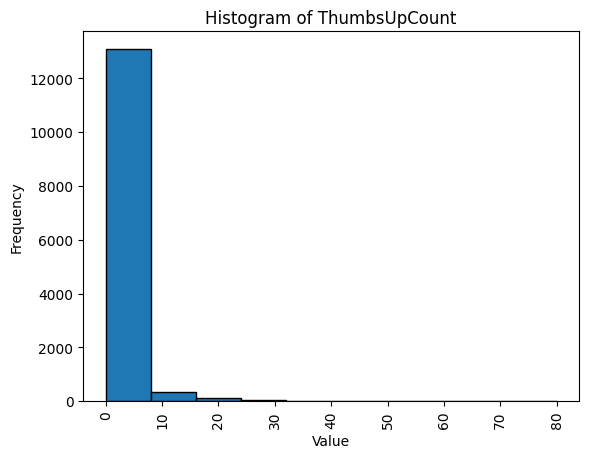

In [33]:
# To plot histogram.
plt.hist(train_data["ThumbsUpCount"],bins=10,edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of ThumbsUpCount')
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='ThumbsUpCount'>

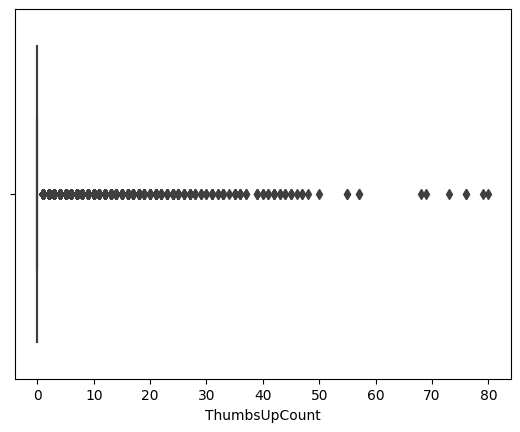

In [34]:
# To plot the box plot
sns.boxplot(x='ThumbsUpCount', data=train_data)

In [35]:
# Drop the outliers With value ThumbsUpCount>=50.
index_pcount = train_data[(train_data['ThumbsUpCount']>=50)].index
train_data.drop(index_pcount , axis='index', inplace=True)

Observation:

1.   There are 57 distnict value in ThumbsUpCount.
2.   Min value is 0 for ThumbsUpCount and Max value is 80 for thumbsUpCount.
3.   There are 7 outliers in ThumbsUpCount.

### 11.ThumbsDownCount

In [36]:
print("Unique value:", pd.unique(train_data["ThumbsDownCount"]))
print("No.of distnict values:", len(pd.unique(train_data["ThumbsDownCount"])))
print("Minimum value in ThumbsDownCount",train_data["ThumbsDownCount"].min())
print("Maxinum value in ThumbsDownCount",train_data["ThumbsDownCount"].max())

Unique value: [  0   1  10  29   6   3   5   9   2   4  17   8  13  11   7  12  15  19
  78  26  21  41  16  40  62  31  55  14  24  20  71  25  49  37  39  18
  65  32 126  63  46  30  23 104  42  70  22  27  61  38]
No.of distnict values: 50
Minimum value in ThumbsDownCount 0
Maxinum value in ThumbsDownCount 126


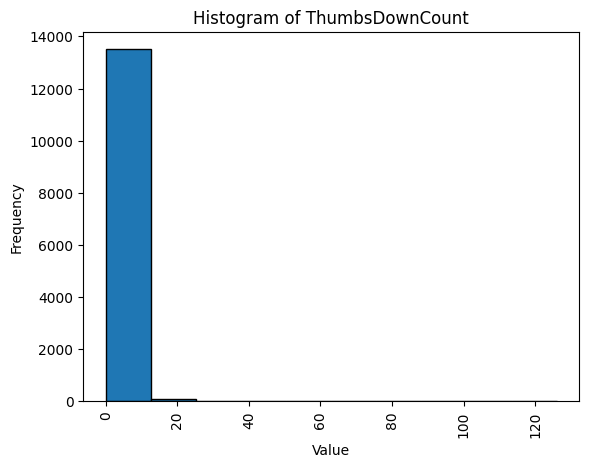

In [37]:
# To plot histogram.
plt.hist(train_data["ThumbsDownCount"],edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of ThumbsDownCount')
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='ThumbsDownCount'>

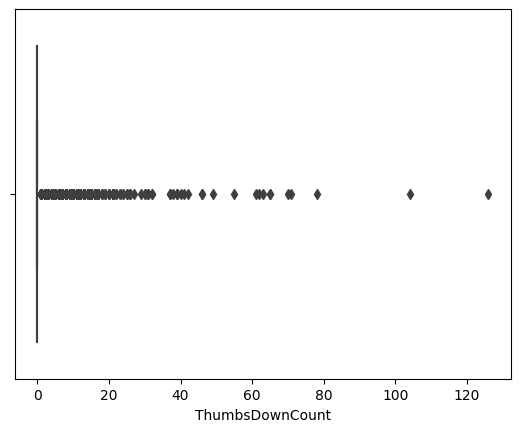

In [38]:
# To plot the box value.
sns.boxplot(x='ThumbsDownCount', data=train_data)

In [39]:
## Drop the outliers With value ThumbsDownCount>=50.
index_count = train_data[(train_data['ThumbsDownCount']>=60)].index
train_data.drop(index_count , axis='index', inplace=True)

In [40]:
train_data.shape

(13612, 15)

Observation:


1.  There are 51 Distinict value in ThumbDownCount.
2.  Min value is 0 and Max value is 126.
3.  There are 3 outliers in ThumbsDownCount.



### 12.Rating

In [41]:
print("Unique value:", pd.unique(train_data["Rating"]))
print("No.of distnict values:", len(pd.unique(train_data["Rating"])))

Unique value: [5 3 4 0 2 1]
No.of distnict values: 6


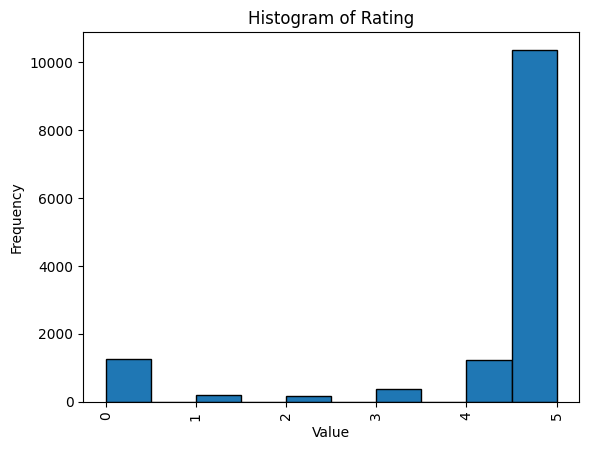

In [42]:
# To plot histogram.
plt.hist(train_data["Rating"],edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Rating')
plt.xticks(rotation='vertical')
plt.show()

Observation:

1.  The data distribution is Left-skewed.
2.  Max rating is 5. so there is imbalance in rating.
3.  There are 6 distnict values present in Rating column.

### 13.Bestscore

In [43]:
print("Unique value:",pd.unique(train_data["BestScore"]))
print("No.of distnict values:",len(pd.unique(train_data["BestScore"])))
print("Minimum Best score:",train_data["BestScore"].min())
print("Maximum Best score:",train_data["BestScore"].max())

Unique value: [100 193 136 253 485 556 530 859 329 354 120 259 840 381 720 623 323 522
 297 538 799 167 278 240 635 400 777 127 414 142 523 390 211 235 516 109
 203 854 767 404 348 484 303 779 588 830 848 770 467 143 757 810 415 819
 261 319 616 440 153 695 163 561 513 833 599 395 752 287 424 740 161 269
 728 196 672 788 527 793 637 628 244 496 473 673 432 185 631 152 486 894
 889 138 807 458 204 615 729 310 535 679 380 439 468 460 804 606 574 184
 296 113 744 745 116 667 618 212 498 376 526 412 456 771 610 687 374 721
 762 525 686 131 634 811 669 723 625 822 617 781 280 123 504 453 645 885
 844 462 922 229 918 818 543 736 759 812 459 750 284 107 643 402 422 311
 907 108 258 869 355 716 592 845 827 223 327 663 619 585 368 591 825 775
 111 879 581 220 866 717 813 275 794 648 536 693 338 846 410 703 683 694
 419 647 791 786 356 715 166 434 575 758 428 732 118 604 386 680 761 785
 171 697 832 274 712 730 408 867 104 593 700 331 684 768 797 195 821 734
 103 436 661 466 632 784 725 316 320 

In [44]:
train_data["BestScore"].value_counts()

BestScore
100    10504
193     1074
253      292
142      147
297      124
       ...  
634        1
523        1
669        1
562        1
754        1
Name: count, Length: 519, dtype: int64

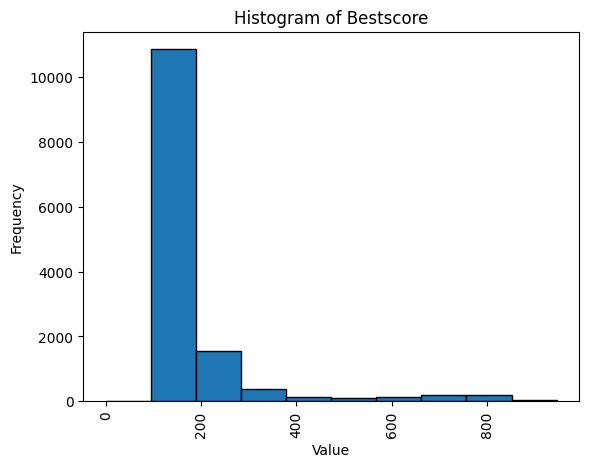

In [45]:
# To plot histogram.
plt.hist(train_data["BestScore"],edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Bestscore')
plt.xticks(rotation='vertical')
plt.show()

Observation:


1.   There are 525 unique value in Best score.
2.   The min value is 0 and Max value is 946.
3.   The best score 100 have highest frequency.
3.   The Data distribution is Right-skewed.





### 3.4 Perform Bivariate Analysis.

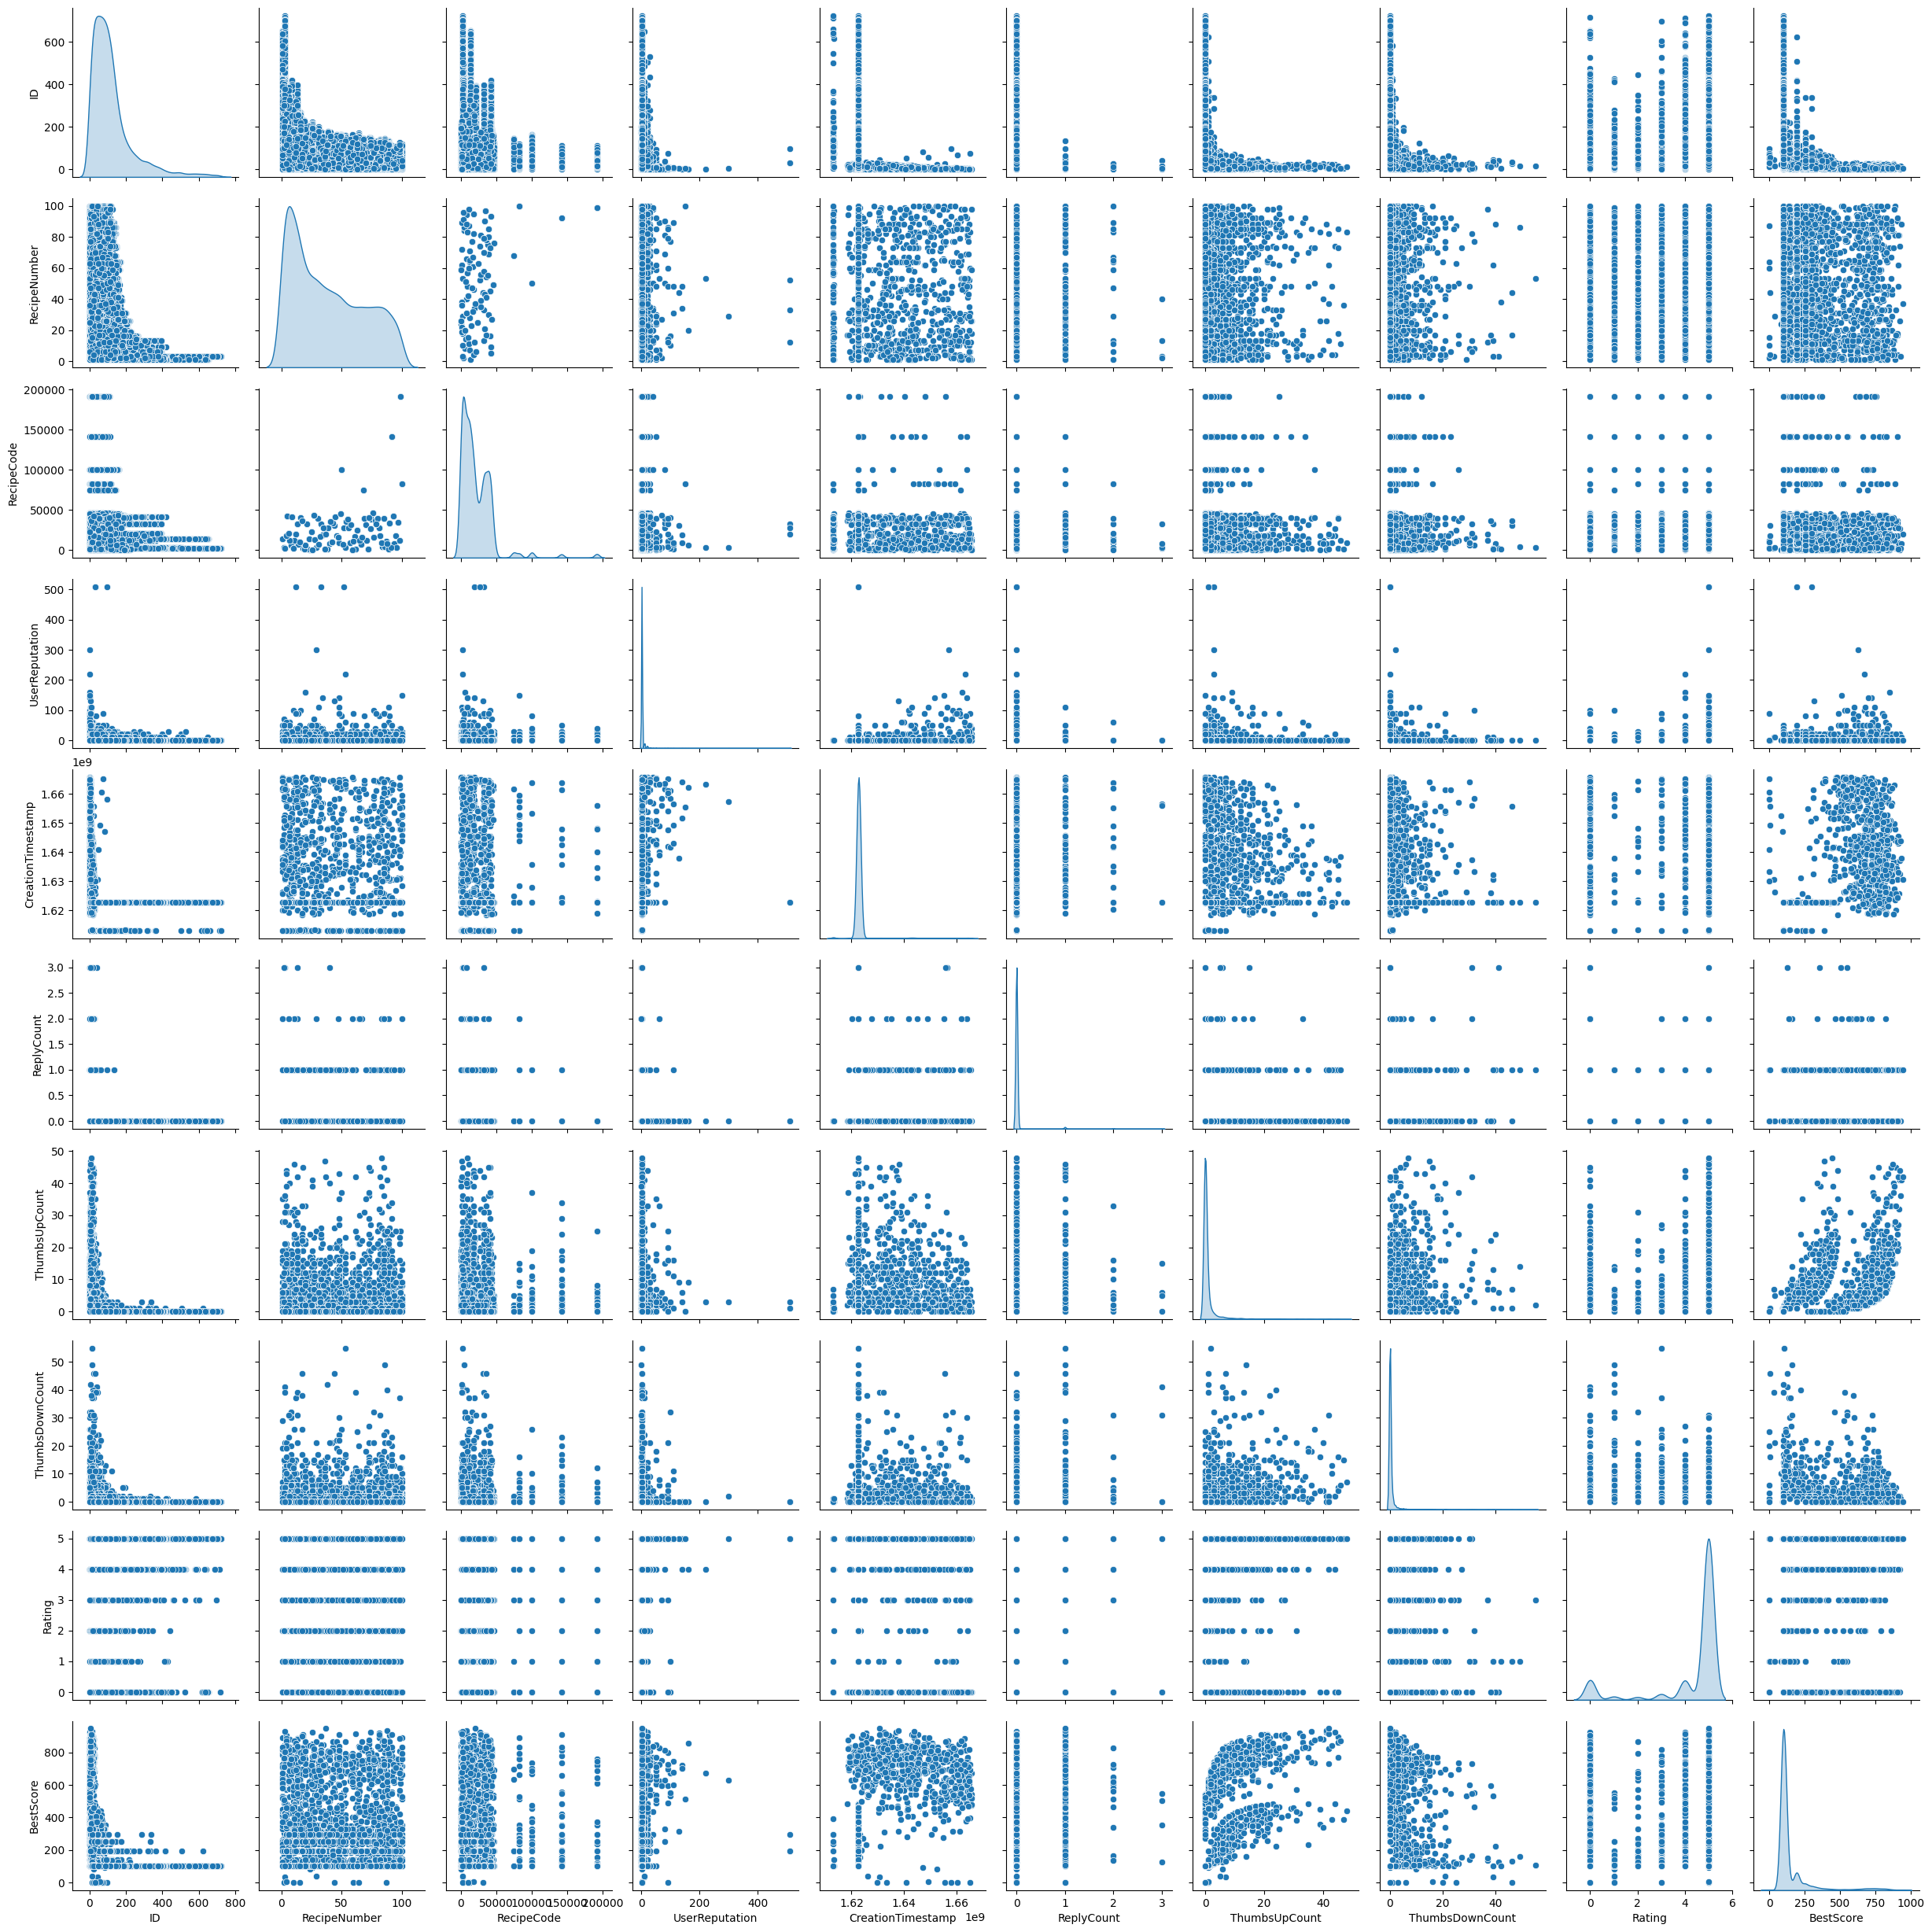

In [46]:
sns.pairplot(train_data, diag_kind="kde")

### 3.5 Display the heat map

<Axes: >

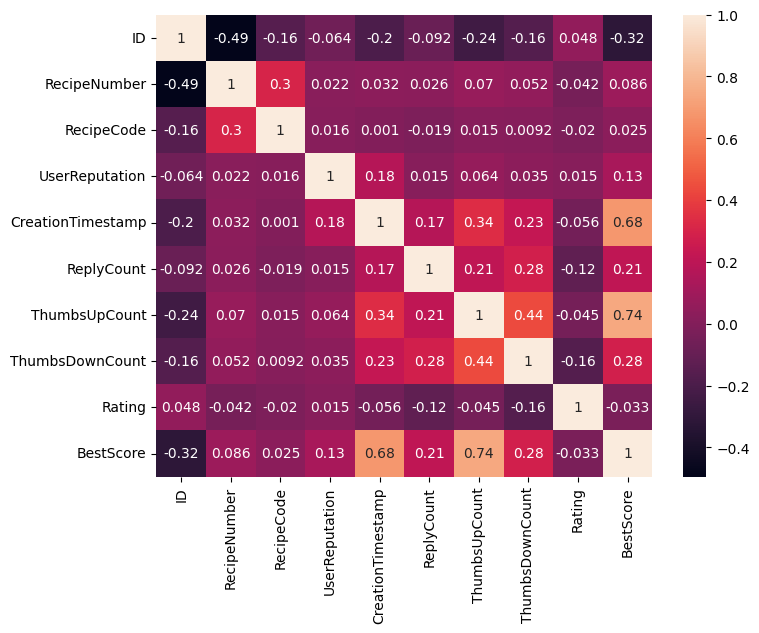

In [47]:
numeric = train_data.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train_data[numeric].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot= True)

Observation:
1. Columns ID,Rating have negative correlation with every columns.
2. Columns Recipenumber,RecipeCode,User Reputation have near to zero correaltion value with every columns.
3. Columns CreationTimeStamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Best score have positive correlation among each other.



## 4 Sepearte the Features and Labels.

In [48]:
X=train_data.drop(["Rating"], axis=1)
y=train_data["Rating"]

## 5. Feature Engineering

In [49]:
import datetime
from datetime import datetime

In [50]:
#Extract the year,month,day,day of week, datetime and hour from Creation time stamp.
X['Year'] = pd.to_datetime(X['CreationTimestamp'], unit='s').dt.year
X['Month'] = pd.to_datetime(X['CreationTimestamp'], unit='s').dt.month
X['Day'] = pd.to_datetime(X['CreationTimestamp'], unit='s').dt.day
X['DayOfWeek'] = pd.to_datetime(X['CreationTimestamp'], unit='s').dt.strftime("%A")
X['datetime'] = pd.to_datetime(X['CreationTimestamp'], unit='s').dt.time
X["Hour"]=pd.to_datetime(X["CreationTimestamp"],unit="s").dt.hour

In [51]:
X.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Recipe_Review,Year,Month,Day,DayOfWeek,datetime,Hour
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,100,great recipe! I have made them just as written...,2021,6,3,Thursday,10:44:38,10
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,100,This is an easy and quick recipe that is great...,2021,6,3,Thursday,10:57:32,10
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,100,I think I was looking for something extra spec...,2021,6,3,Thursday,10:49:17,10
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,100,This is our favorite grilled chicken recipe. ...,2021,6,2,Wednesday,15:48:19,15
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,100,Great basic recipe. I added 2 teaspoons Tuscan...,2021,6,3,Thursday,11:04:20,11


In [52]:
#Categorize the day into morning,afternoon,evening and night.
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 13 <= hour <18 :
        return 'Afternoon'
    elif 18<= hour< 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column 'TimeOfDay'
X['TimeOfDay'] = X['Hour'].apply(categorize_hour)

In [53]:
#Categorize the week into weekend and weekday.
def categorize_day(day):
    if day in ["Saturday","Sunday"]:
        return 1
    else:
        return 0 

# Apply the function to create a new column 'TimeOfDay'
X['weekend'] = X['DayOfWeek'].apply(categorize_day)

In [54]:
# Weightedvote column
X["Weightedvote"]=(1*X["ThumbsUpCount"])+((-1)*X["ThumbsDownCount"])

In [55]:
#Higher Reputation column
X["HigherReputation"]=X["UserReputation"]*(X["ThumbsUpCount"]+X["ThumbsDownCount"])

In [56]:
X.head()

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,...,Year,Month,Day,DayOfWeek,datetime,Hour,TimeOfDay,weekend,Weightedvote,HigherReputation
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,...,2021,6,3,Thursday,10:44:38,10,Morning,0,0,0
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,...,2021,6,3,Thursday,10:57:32,10,Morning,0,-1,1
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,...,2021,6,3,Thursday,10:49:17,10,Morning,0,0,0
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,...,2021,6,2,Wednesday,15:48:19,15,Afternoon,0,0,0
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,...,2021,6,3,Thursday,11:04:20,11,Morning,0,0,0


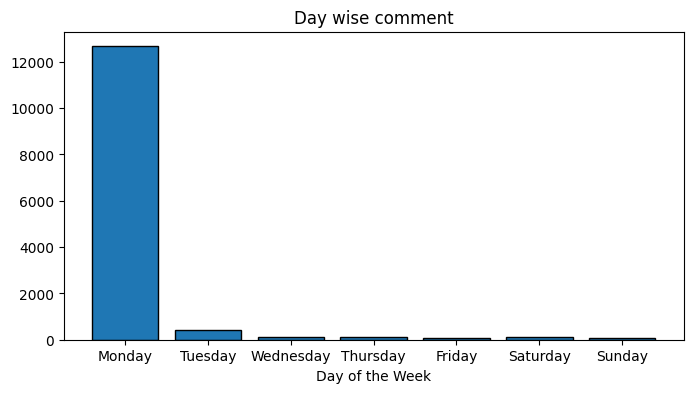

In [57]:
# To plot histogram of DayOf week column.
plt.figure(figsize=(8,4))
plt.hist(X['DayOfWeek'], bins=7, range=[0, 7], align='left', rwidth=0.8,edgecolor='black')
plt.title('Day wise comment')
plt.xlabel('Day of the Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

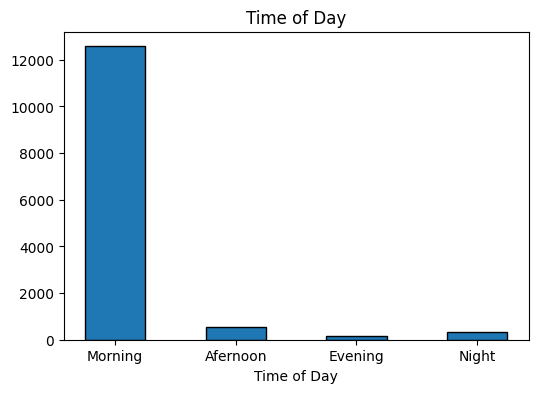

In [58]:
#To plot histogram of TimeOfDay column.
plt.figure(figsize=(6,4))
plt.hist(X['TimeOfDay'], bins=4, range=[0, 4], align='left', rwidth=0.5,edgecolor='black')
plt.title('Time of Day')
plt.xlabel('Time of Day')
plt.xticks(range(4), ['Morning', 'Afernoon', 'Evening', 'Night'])
plt.show()

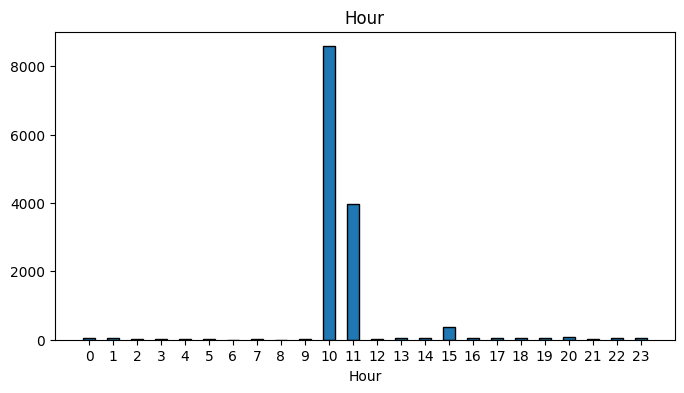

In [59]:
# To plot histogram of hour column.
plt.figure(figsize=(8,4))
plt.hist(X['Hour'], bins=24, range=[0, 24], align='left', rwidth=0.5,edgecolor='black')
plt.title('Hour')
plt.xlabel('Hour')
plt.xticks(range(24))
plt.show()

In [60]:
#drop creation time stamp and date time column.
finalX=X.drop(["CreationTimestamp","datetime"],axis=1)

In [61]:
# To check no.columns in X.
finalX.columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'CommentID', 'UserID',
       'UserName', 'UserReputation', 'ReplyCount', 'ThumbsUpCount',
       'ThumbsDownCount', 'BestScore', 'Recipe_Review', 'Year', 'Month', 'Day',
       'DayOfWeek', 'Hour', 'TimeOfDay', 'weekend', 'Weightedvote',
       'HigherReputation'],
      dtype='object')

Observation:
1. More comments are posted on Mondays compared to other days.
2. On Mondays, the morning sees the highest number of comments compared to other times.
3. Specifically, at 10:00 AM and 11:00 AM on Monday mornings, the highest number of comments are made.

## 6. Train_test_split the train_data.

In [62]:
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform stratified sampling
for train_index, test_index in stratified_splitter.split(finalX, y):
    X_train, X_val = finalX.iloc[train_index], finalX.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

In [63]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(10889, 22)
(2723, 22)
(10889,)
(2723,)


In [64]:
#Drop the Recipe_Review column from X_train_mix and X_val_mix.
X_train_mix=X_train.drop(["Recipe_Review","CommentID"],axis=1)
X_val_mix=X_val.drop(["Recipe_Review","CommentID"],axis=1)

In [65]:
#Store Recipe_Review column into X_train_text and X_test_text variable.
X_train_text=X_train[["Recipe_Review","CommentID"]]
X_val_text=X_val[["Recipe_Review","CommentID"]]

In [66]:
X_train_mix.head()

,ID,RecipeNumber,RecipeCode,RecipeName,UserID,UserName,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Year,Month,Day,DayOfWeek,Hour,TimeOfDay,weekend,Weightedvote,HigherReputation
2310,41,64,12700,Big Soft Ginger Cookies,u_1oKiFfDeXE0ij5qUTB9hbaVafYq,SonalPanda,1,0,0,2,100,2021,6,3,Thursday,11,Morning,0,-2,2
3065,283,2,3309,Best Ever Banana Bread,u_1oKYtn7cdgyrTMJvcoRkN73UCOV,Halawa,1,0,0,0,100,2021,6,3,Thursday,10,Morning,0,0,0
9543,140,36,1196,Pumpkin Bread,u_1oKWHbDawTthT9lTyg1IG17T99L,NT5585,1,0,0,0,100,2021,6,3,Thursday,11,Morning,0,0,0
6710,147,30,39549,Forgotten Jambalaya,u_1oKWFlMziaFAqRWLvZ2NtmIjC8d,ginny3235,1,0,0,0,100,2021,6,3,Thursday,10,Morning,0,0,0
5499,80,78,36217,Creamy Macaroni and Cheese,u_1oKYTFnFVPI1kk6h5qUowaePSsd,jnezelek,1,0,1,0,193,2021,6,3,Thursday,10,Morning,0,1,1


In [67]:
X_val_mix.head()

,ID,RecipeNumber,RecipeCode,RecipeName,UserID,UserName,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore,Year,Month,Day,DayOfWeek,Hour,TimeOfDay,weekend,Weightedvote,HigherReputation
3539,40,46,18345,Simple Au Gratin Potatoes,u_1oKdUIpZgTLkHH6qK2Yk9PvEusz,PatrickSpadinger,1,0,0,0,100,2021,6,3,Thursday,11,Morning,0,0,0
10831,101,65,12347,Creamy Coleslaw,u_1oKW5R48VwHUWUodXbxNs1I1Ktj,kpkaren,1,0,0,0,100,2021,6,3,Thursday,10,Morning,0,0,0
10696,151,53,3143,Pumpkin Bars,u_1oKXZoZd7lQLtFu8CTN8otOHoti,bel62pre,1,0,0,0,100,2021,6,3,Thursday,10,Morning,0,0,0
6240,71,96,3290,Brown Sugar Oatmeal Pancakes,u_1oKW3yPrnkF7POtWXNOVCPm9q1x,agwife,1,0,0,0,100,2021,6,3,Thursday,10,Morning,0,0,0
13435,66,25,23222,Baked Mushroom Chicken,u_1oKWXyKF1S9u7Exxp92g4yWmEws,Jothebaker,1,0,0,0,100,2021,6,3,Thursday,10,Morning,0,0,0


In [68]:
#print the dimension of X_train_mix and X_Val_mix.
print(X_train_mix.shape)
print(X_val_mix.shape)

(10889, 20)
(2723, 20)


In [69]:
X_train_mix.columns

Index(['ID', 'RecipeNumber', 'RecipeCode', 'RecipeName', 'UserID', 'UserName',
       'UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount',
       'BestScore', 'Year', 'Month', 'Day', 'DayOfWeek', 'Hour', 'TimeOfDay',
       'weekend', 'Weightedvote', 'HigherReputation'],
      dtype='object')

## 7.Scaling

### 7.1 Apply scaling on numerical and categorical columns.

In [70]:
# Define the pipeline
numerical_pipeline=Pipeline(steps=[("scaler",StandardScaler())])
categorical_pipeline = Pipeline(steps=[("onehot",OneHotEncoder(handle_unknown='ignore'))])

In [71]:
#Define the numerical and categorial columns
numerical_cols=["ID","RecipeNumber","RecipeCode","UserReputation","ReplyCount","ThumbsUpCount",
                "ThumbsDownCount","BestScore","Year","Month","Day","Hour","Weightedvote","HigherReputation"]
categorical_cols=["RecipeName","DayOfWeek","TimeOfDay"]

In [72]:
#Create a column transformer
ct= ColumnTransformer(transformers=[('num',numerical_pipeline,numerical_cols),
                                  ('cat',categorical_pipeline,categorical_cols)])

In [73]:
#Fit and transform the tranning data
X_train_processed= ct.fit_transform(X_train_mix)

In [74]:
print(X_train_processed.shape)

(10889, 125)


In [75]:
#transform the validation data
X_val_processed= ct.transform(X_val_mix)

In [76]:
print(X_val_processed.shape)

(2723, 125)


### 7.2 Apply TFIDVectorization.

In [77]:
import re
def clean_text(text):
    # Convert &#39 to apostrophe
    text = text.replace('&#39;', "'")
    # Remove extra spaces and punctuation
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [78]:
X_train_text.loc[:,"Recipe_Review"]= X_train_text["Recipe_Review"].apply(clean_text)

In [79]:
X_val_text.loc[:,"Recipe_Review"]= X_val_text["Recipe_Review"].apply(clean_text)

In [80]:
#Define TfidVectorizer function.
tfidf1=TfidfVectorizer()

In [81]:
# Apply TfidVectorizer function on df1 and df2.
X_train_text_vec1=tfidf1.fit_transform(X_train_text["Recipe_Review"])
X_val_text_vec1=tfidf1.transform(X_val_text["Recipe_Review"])

In [82]:
tfidf2=TfidfVectorizer()

In [83]:
# Apply TfidVectorizer function on username column
X_train_text_vec2=tfidf2.fit_transform(X_train_text["CommentID"])
X_val_text_vec2=tfidf2.transform(X_val_text["CommentID"])

In [84]:
#tfidf3=TfidfVectorizer()

In [85]:
# Apply TfidVectorizer function on username column
#X_train_text_vec3=tfidf3.fit_transform(X_train_text["CommentID"])
#X_val_text_vec3=tfidf3.transform(X_val_text["CommentID"])

In [86]:
X_train_text_vec=np.hstack([X_train_text_vec1.toarray(),X_train_text_vec2.toarray()])
X_val_text_vec=np.hstack([X_val_text_vec1.toarray(),X_val_text_vec2.toarray()])

In [87]:
#Print the dimension of X_train_processed,X_val_processed,X_train_text & X_test_vec.
print(X_train_processed.shape)
print(X_val_processed.shape)
print(X_train_text_vec.shape)
print(X_val_text_vec.shape)

(10889, 125)
(2723, 125)
(10889, 20321)
(2723, 20321)


In [88]:
# Combine the X_train_processed and X_train_text_vec using the hstack & print dimension.
finalX_train= np.hstack([X_train_processed.toarray(),X_train_text_vec])
print(finalX_train.shape)

(10889, 20446)


In [89]:
# Combine the X_val_processed and X_val_vec using the hstack and print it's dimension.
finalX_val=np.hstack([X_val_processed.toarray(),X_val_text_vec])
print(finalX_val.shape)

(2723, 20446)


Observation:
1. After applying scaling and TFID vectorization,
      1.train_data dimension : (10889,2226)
      2.validation_data dimension : (2723,2226)

## 8.Building the baseline model.

In [90]:
# Dummy classifier
from sklearn.dummy import DummyClassifier
dummy=DummyClassifier(random_state=42)
dummy.fit(finalX_train,y_train)

DummyClassifier(random_state=42)

In [91]:
#Predict the y_hat_train and y_hat_Val value.
y_hat_train=dummy.predict(finalX_train)
y_hat_val=dummy.predict(finalX_val)

In [92]:
train_score = ac(y_hat_train, y_train)
val_score = ac(y_hat_val, y_val)
print(f'Train score: {train_score}, Validation score: {val_score}')

Train score: 0.7610432546606667, Validation score: 0.7612926918839515


## 9. Apply Logistics regression

### 9.1 Simple Logistics Regression

In [93]:
Lr=LogisticRegression(max_iter=5000,random_state=42,n_jobs=-1)
Lr.fit(finalX_train,y_train)

LogisticRegression(max_iter=5000, n_jobs=-1, random_state=42)

In [94]:
Lr_y_hat_train=Lr.predict(finalX_train)
Lr_y_hat_val=Lr.predict(finalX_val)

In [95]:
Lr_train_score = ac(Lr_y_hat_train, y_train)
Lr_val_score = ac(Lr_y_hat_val, y_val)
print(f'Train score: {Lr_train_score}, Validation score: {Lr_val_score}')

Train score: 0.8887868491137846, Validation score: 0.7770840984208593


#### 9.1.2 Classification Report

In [96]:
#val_score_cr=cr(y_val,Lr_y_hat_val)
#print(f'val score:{val_score_cr}')

#### 9.1.3 Confusion Matrix

In [97]:
cmf_train=cm(y_train,Lr_y_hat_train)
cmf_val=cm(y_val,Lr_y_hat_val)

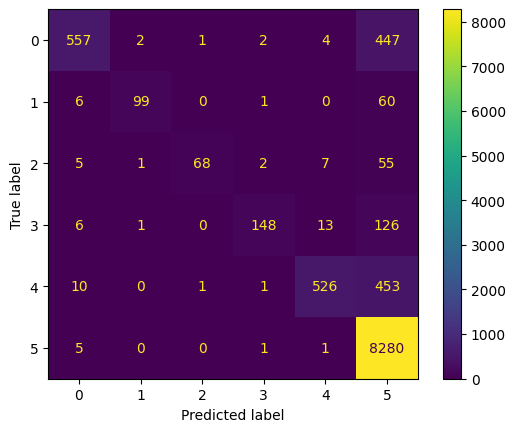

In [98]:
cnf_train = ConfusionMatrixDisplay(cmf_train)
cnf_train.plot()

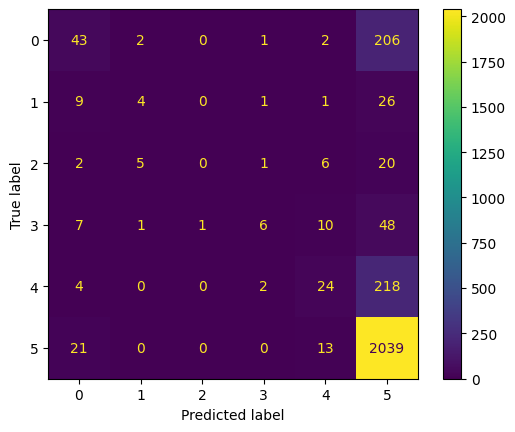

In [99]:
cnf_validate = ConfusionMatrixDisplay(cmf_val)
cnf_validate.plot()

Observation:

1. Training_score=0.8123 and validation_score=0.7725.
2. Classification report for validation data : Rating-5 have good precision,recall and F1-score.
3. Confusion matrix for train data:  Model correctly predicted majority rating-5 from recipe-review.
4. Confusion Matrix for validation data: Model poorly predicted rating-1,2,3,4 from recip_review.

### 9.2 Hyperparameter tuning with RandomizedSeachCV.

In [100]:
#Using the Randomized search cv.
params = {'penalty' : ['l1','l2'],"max_iter":[1000,2000,3000,5000],'C':[0.5,1,2,3,1.5]}

Lr_rs = RandomizedSearchCV(Lr,param_distributions=params,cv=5,n_jobs=-1)
Lr_rs.fit(finalX_train,y_train)
Lr_rs = Lr_rs.best_estimator_
print("The best parameters using RandomizedSearchCV is :",Lr_rs)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

The best parameters using RandomizedSearchCV is : LogisticRegression(C=3, max_iter=2000, n_jobs=-1, random_state=42)


In [101]:
lr_rs = LogisticRegression(max_iter=5000,C=1.5,random_state=42,n_jobs=-1)
lr_rs.fit(finalX_train, y_train)

LogisticRegression(C=1.5, max_iter=5000, n_jobs=-1, random_state=42)

In [102]:
lr_y_hat_train=Lr.predict(finalX_train)
lr_y_hat_val=Lr.predict(finalX_val)

In [103]:
lr_train_score = ac(lr_y_hat_train, y_train)
lr_val_score = ac(lr_y_hat_val, y_val)
print(f'Train score: {lr_train_score}, Validation score: {lr_val_score}')

Train score: 0.8887868491137846, Validation score: 0.7770840984208593


#### 9.2.1: Claasification Report

In [104]:
#val_score_cr=cr(y_val,lr_y_hat_val)
#print(f'val score:{val_score_cr}')

#### 9.2.2 Confusion Matrix

In [105]:
cmf_train=cm(y_train,lr_y_hat_train)
cmf_val=cm(y_val,lr_y_hat_val)

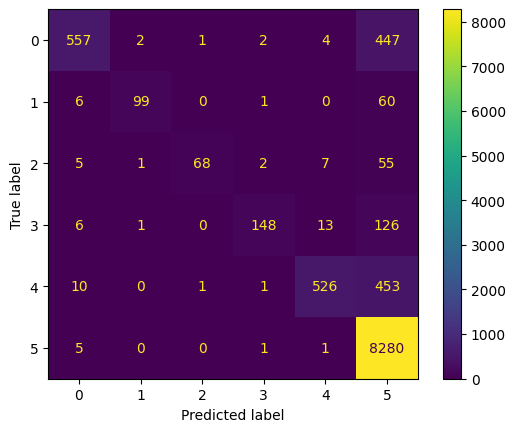

In [106]:
cnf_train_lr = ConfusionMatrixDisplay(cmf_train)
cnf_train_lr.plot()

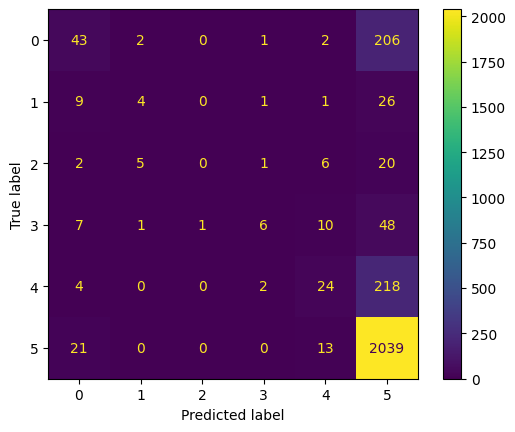

In [107]:
cnf_validate_lr = ConfusionMatrixDisplay(cmf_val)
cnf_validate_lr.plot()

Observation:
1. The best hyper parameters are : {Penalty:L2, max_iter=150, C=3}
2. Logitisc regression model is slightly overfitting.
3. From classification report & confusion matrix,we observe that model have good precision,recall and f1-score on rating-0 and rating-5.
4. Model have poor precision,recall and f1-score on other classes.

## 10. KNN algorithm

### 10.1 KNN Algorithm

In [108]:
Knn_model=KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
Knn_model.fit(finalX_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [109]:
knn_y_hat_train=Knn_model.predict(finalX_train)
knn_y_hat_val=Knn_model.predict(finalX_val)

In [110]:
knn_train_score = ac(knn_y_hat_train, y_train)
knn_val_score = ac(knn_y_hat_val, y_val)
print(f'Train score: {knn_train_score}, Validation score: {knn_val_score}')

Train score: 0.7797777573698228, Validation score: 0.7645978699963276


#### 10.1.2 Classification Report

In [111]:
#knn_val_score_cr=cr(y_val,knn_y_hat_val)
#print(f'val score:{knn_val_score_cr}')

#### 10.1.3 Confusion Matrix

In [112]:
cmf_train=cm(y_train,knn_y_hat_train)
cmf_val=cm(y_val,knn_y_hat_val)

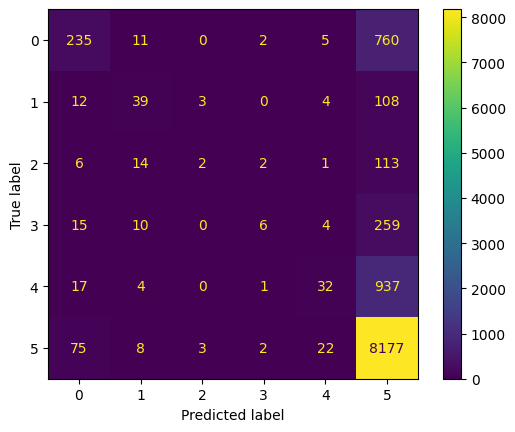

In [113]:
cnf_train_knn = ConfusionMatrixDisplay(cmf_train)
cnf_train_knn.plot()

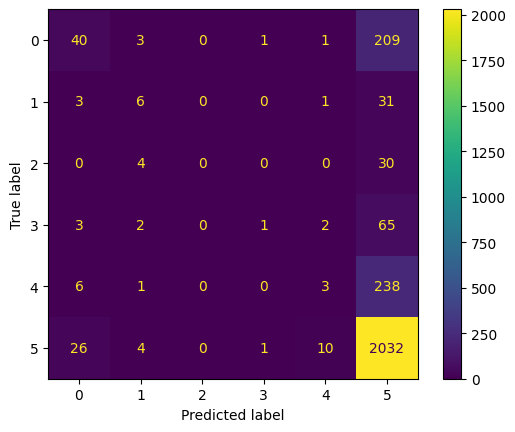

In [114]:
cnf_validate_knn = ConfusionMatrixDisplay(cmf_val)
cnf_validate_knn.plot()

Observation:
1.Train_score=0.78060 and validation score= 0.7634
2.From classification report & confusion matrix,we observe that model have good precision,recall and f1-score on rating-5.
3.Model have poor precision,recall and f1-score on other Rating.

### 10.3Tuning Hyperparamter using Randomized search cv

In [115]:
#Using the Randomized search cv.
params = {'n_neighbors' : [i for i in range(1,10)]}

rs = RandomizedSearchCV(Knn_model,param_distributions=params,cv=5,n_jobs=-1)
rs.fit(finalX_train,y_train)
KNN_rs = rs.best_estimator_
print("The best parameters using RandomizedSearchCV is :",KNN_rs)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


The best parameters using RandomizedSearchCV is : KNeighborsClassifier(n_jobs=-1, n_neighbors=9)


In [116]:
KNN_rs = KNeighborsClassifier(n_neighbors=10,n_jobs=-1)
KNN_rs.fit(finalX_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [117]:
knnr_y_hat_train=KNN_rs.predict(finalX_train)
knnr_y_hat_val=KNN_rs.predict(finalX_val)

In [118]:
knnr_train_score = ac(knnr_y_hat_train, y_train)
knnr_val_score = ac(knnr_y_hat_val, y_val)
print(f'Train score: {knnr_train_score}, Validation score: {knnr_val_score}')

Train score: 0.7797777573698228, Validation score: 0.7645978699963276


#### 10.3.1 Classification Report

In [119]:
#knn_val_score_cr=cr(y_val,knnr_y_hat_val,)
#print(f'val score:{knn_val_score_cr}')

#### 10.3.2 Confusion Matrix

In [120]:
cmf_train=cm(y_train,knnr_y_hat_train)
cmf_val=cm(y_val,knnr_y_hat_val)

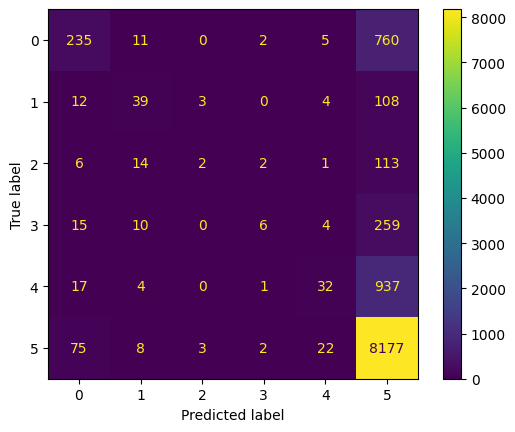

In [121]:
cnf_train_knn = ConfusionMatrixDisplay(cmf_train)
cnf_train_knn.plot()

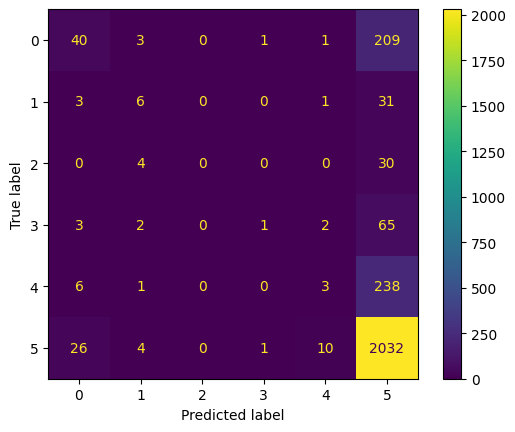

In [122]:
cnf_validate_knn = ConfusionMatrixDisplay(cmf_val)
cnf_validate_knn.plot()

Observation:
1. Training_score=0.7805 and validation_score=0.7631.
2. Best n_neighbours= 9
3. Classification report for validation data : Rating-5 have good precision,recall and F1-score.
4. Confusion matrix for train data: Model correctly predicted all rating from recipe-review.
5. Confusion Matrix for validation data: Model poorly predicted rating 0,1,2,3,4 from recipe-review.


## 11.Random Forest Classifier

### 11.1 RandomForest Classifier

In [123]:
#Define the RandomForest Classifier
rf_class = RandomForestClassifier(random_state=42,n_jobs=-1)
rf_class.fit(finalX_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [124]:
#Predict the y_hat_train and y_hat_val value.
rf_y_hat_train=rf_class.predict(finalX_train)
rf_y_hat_val=rf_class.predict(finalX_val)

In [125]:
#calculate the accuracy score for train data and validation data.
rf_train_score = ac(rf_y_hat_train, y_train)
rf_val_score = ac(rf_y_hat_val, y_val)
print(f'Training score: {rf_train_score}, Validation score: {rf_val_score}')

Training score: 0.9998163284048122, Validation score: 0.7682702901211899


#### 11.2 Classification Report

In [126]:
#rf_val_score_cr=cr(y_val,lr_y_hat_val)
#print(f'val score:{rf_val_score_cr}')

#### 11.3 Confusion Matrix

In [127]:
cmf_train_rf=cm(y_train,rf_y_hat_train)
cmf_val_rf=cm(y_val,rf_y_hat_val)

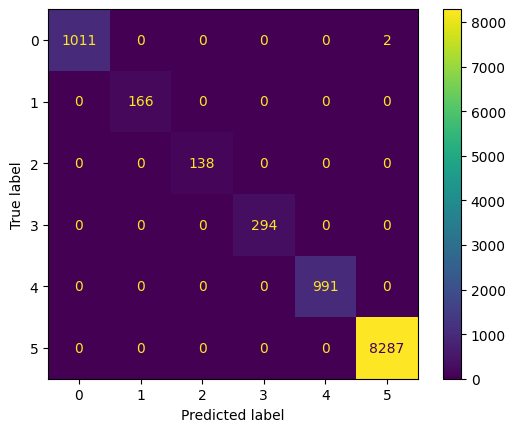

In [128]:
cnf_train_rf = ConfusionMatrixDisplay(cmf_train_rf)
cnf_train_rf.plot()

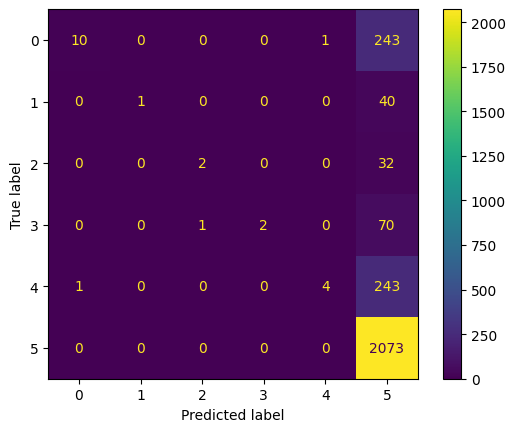

In [129]:
cnf_validate_rf = ConfusionMatrixDisplay(cmf_val_rf)
cnf_validate_rf.plot()

Observation:

1. Training_score=1.0 and validation_score=0.7726. So Model is overfit Here on trainning data.
2. Classification report for validation data : Rating-5 have good precision,recall and F1-score.
3. Confusion matrix for train data:  Model correctly predicted all rating from recipe-review.
4. Confusion Matrix for validation data: Model poorly predicted rating 0,1,2,3,4 from recipe-review.

### 11.2 Hyper parameter using Randomized Search CV.

In [130]:
tuned_parameters = [{"n_estimators": [50,100], "max_features" : ["sqrt", "log2"],
                   "min_samples_split" : [2,4,6,8], "bootstrap": [True, False]}]

RF_model_GS = RandomizedSearchCV(RandomForestClassifier(), param_distributions=tuned_parameters)
RF_model_GS.fit(finalX_train,y_train)
print ("The best parameter value is:",RF_model_GS.best_params_)

The best parameter value is: {'n_estimators': 50, 'min_samples_split': 4, 'max_features': 'log2', 'bootstrap': False}


In [131]:
rf_reg_rs = RandomForestClassifier(n_estimators = 50,min_samples_split =8,
                                   max_features = "sqrt",bootstrap= False,random_state=42,n_jobs=-1)
rf_reg_rs.fit(finalX_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=8, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [132]:
#Predict the y_hat_train and y_hat_val value.
rs_y_hat_train=rf_reg_rs.predict(finalX_train)
rs_y_hat_val=rf_reg_rs.predict(finalX_val)

In [133]:
#calculate the accuracy score for train data and validation data.
rfr_train_score = ac(rs_y_hat_train, y_train)
rfr_val_score = ac(rs_y_hat_val, y_val)
print(f'Training score: {rfr_train_score}, Validation score: {rfr_val_score}')

Training score: 1.0, Validation score: 0.770106500183621


#### 11.2.1 Classification Matrix

In [134]:
#r_val_score_cr=cr(y_val,rs_y_hat_val)
#print(f'val score:{r_val_score_cr}')

#### 11.2.2 Confusion Matrix

In [135]:
cmf_train_r=cm(y_train,rs_y_hat_train)
cmf_val_r=cm(y_val,rs_y_hat_val)

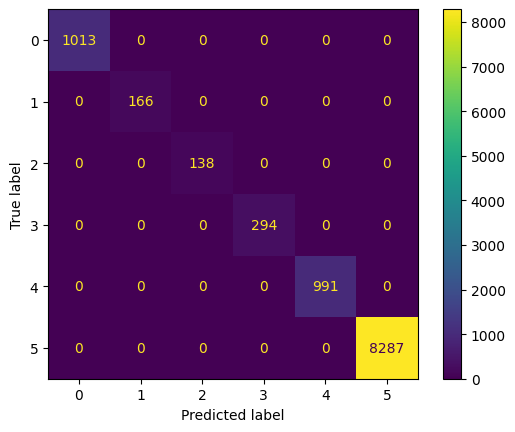

In [136]:
cnf_train_r = ConfusionMatrixDisplay(cmf_train_r)
cnf_train_r.plot()

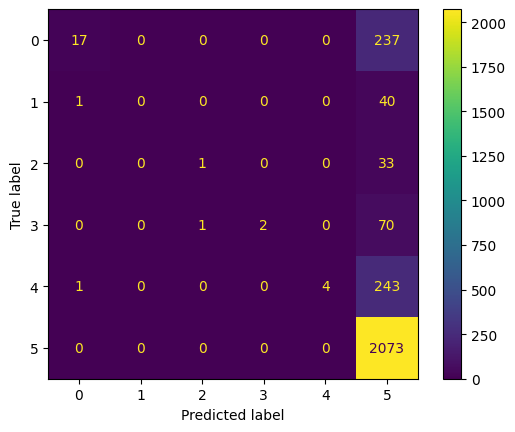

In [137]:
cnf_validate_r = ConfusionMatrixDisplay(cmf_val_r)
cnf_validate_r.plot()

Observation:
1. The best parameter value is: {'n_estimators': 50, 'min_samples_split': 8, 'max_features': 'sqrt', 'bootstrap': False}
2. Training_score=0.9980 and validation_score=0.7734. So Model is overfit Here on trainning data.
3. Classification report for validation data : Rating-5 have good precision,recall and F1-score.
4. Confusion matrix for train data:  Model correctly predicted all rating from recipe-review.
5. Confusion Matrix for validation data: Model correctly predicted rating-5 from recipe-review.

## 12.LightBoost Classifier

### 12.1 LightBoost Classifier

In [138]:
Lclf=lgb.LGBMClassifier(random_state=42,n_jobs=-1)
Lclf.fit(finalX_train,y_train)

LGBMClassifier(random_state=42)

In [139]:
Lf_y_hat_train=Lclf.predict(finalX_train)
Lf_y_hat_val=Lclf.predict(finalX_val)

In [140]:
Lf_train_score = ac(Lf_y_hat_train, y_train)
Lf_val_score = ac(Lf_y_hat_val, y_val)
print(f'Training score: {Lf_train_score}, Validation score: {Lf_val_score}')

Training score: 0.9535310864174855, Validation score: 0.781491002570694


#### 12.1.2 Classification Report

In [141]:
#Lf_val_score_cr=cr(y_val,Lf_y_hat_val)
#print(f'val score:{Lf_val_score_cr}')

#### 12.1.3 Confusion Matrix

In [142]:
Lf_cmf_train=cm(y_train,Lf_y_hat_train)
Lf_cmf_val=cm(y_val,Lf_y_hat_val)

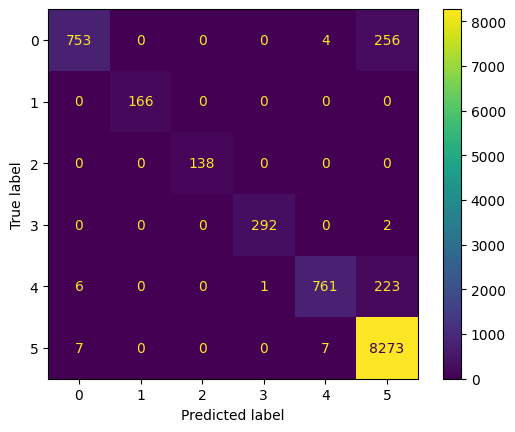

In [143]:
Lf_cnf_train = ConfusionMatrixDisplay(Lf_cmf_train)
Lf_cnf_train.plot()

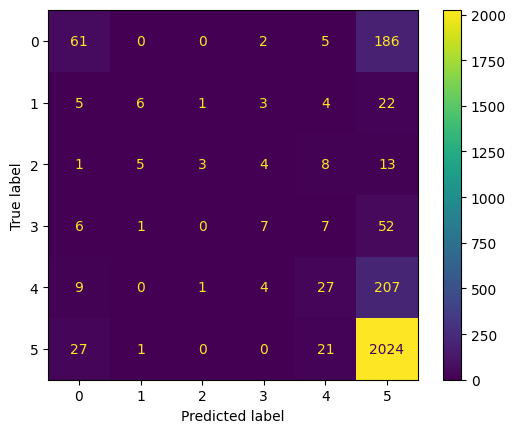

In [144]:
Lf_cnf_validate = ConfusionMatrixDisplay(Lf_cmf_val)
Lf_cnf_validate.plot()

Observation:
1. Training_score=0.9565 and validation_score=0.7803. So Model is overfit Here on trainning data.
2. Classification report for validation data : Rating-5 have good precision,recall and F1-score.
3. Confusion matrix for train data:  Model correctly predicted all rating from recipe-review.
4. Confusion Matrix for validation data: Model correctly predicted rating-5 from recipe-review.

### 12.2 Hyper parameter Tuning using Randomized SearchCV.

In [145]:
tuned_parameters = [{"num_leaves": [20,30,40], "learning_rate" : [0.01,0.1,0.2],
                    "max_depth" : [5,10,15],"min_child_samples":[10,20,30],"feature_fraction":[0.8,0.9,1],
                    "bagging_fraction":[0.8,0.9,1]}]

lgbmc=lgb.LGBMClassifier(random_state=42,max_iterations=5000)
lgbmc_model = RandomizedSearchCV(estimator=lgbmc,param_distributions=tuned_parameters)
lgbmc_model.fit(finalX_train,y_train)
print ("The best parameter value is:",lgbmc_model.best_params_)

[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] feature_fraction is set=1, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1
[LightGBM] [Warning] Unknown parameter: max_iterations
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Cu

In [146]:
lg_classifier_rs = lgb.LGBMClassifier(num_leaves=40,min_child_samples=20,max_depth=10,learning_rate=0.1,
                                     feature_fraction=0.8,bagging_fraction=0.8,random_state=42,n_jobs=-1)
lg_classifier_rs.fit(finalX_train, y_train)

LGBMClassifier(bagging_fraction=0.8, feature_fraction=0.8, max_depth=10,
               num_leaves=40, random_state=42)

In [147]:
lg_y_hat_train=lg_classifier_rs.predict(finalX_train)
lg_y_hat_val=lg_classifier_rs.predict(finalX_val)

In [148]:
lfr_train_score = ac(lg_y_hat_train, y_train)
lfr_validation_score = ac(lg_y_hat_val, y_val)
print(f'Training score: {lfr_train_score}, Validation score: {lfr_validation_score}')

Training score: 0.9263476903296906, Validation score: 0.7818582445831803


#### 12.2.1 Classification Report

In [149]:
#lgr_val_score_cr=cr(y_val,lg_y_hat_val)
#print(f'val score:{lgr_val_score_cr}')

#### 12.2.2 Confusion Matrix

In [150]:
lgr_cmf_train=cm(y_train,lg_y_hat_train)
lgr_cmf_val=cm(y_val,lg_y_hat_val)

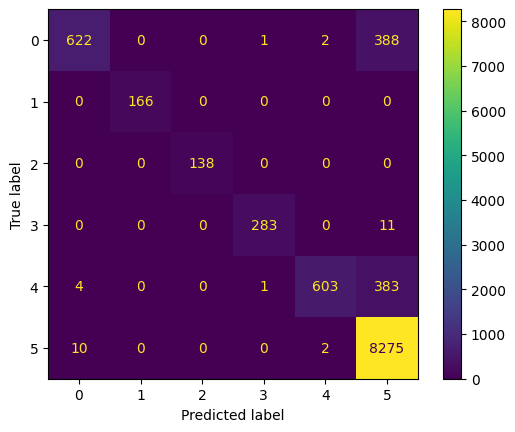

In [151]:
lf_cnf_train = ConfusionMatrixDisplay(lgr_cmf_train)
lf_cnf_train.plot()

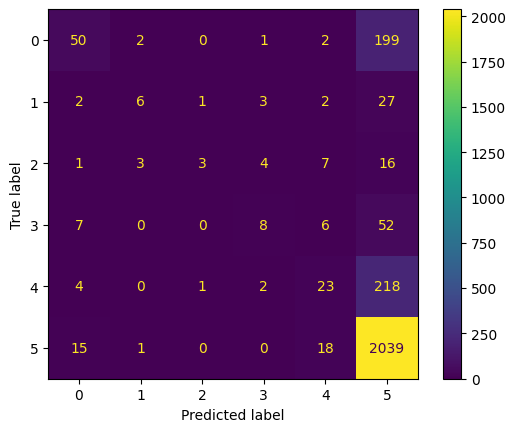

In [152]:
lf_cnf_validate = ConfusionMatrixDisplay(lgr_cmf_val)
lf_cnf_validate.plot()

Observation:
1. Training_score=0.9267 and validation_score=0.7796. So Model is overfit Here on training data.
2. Classification report for validation data : Rating-1,2,3,4 have poor precision,recall and F1-score.
3. Confusion matrix for train data:  370 actual label are 0 but model predicted as Label-5. 
4. Confusion Matrix for validation data: Model correctly predicted majority rating-5 from recipe review.

## 13.XGBoost 

In [153]:
from xgboost import XGBClassifier

In [154]:
xgb=XGBClassifier(random_state=42,n_jobs=-1)
xgb.fit(finalX_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [155]:
xg_y_hat_train=xgb.predict(finalX_train)
xg_y_hat_val=xgb.predict(finalX_val)

In [156]:
xg_train_score = ac(xg_y_hat_train, y_train)
xg_val_score = ac(xg_y_hat_val, y_val)
print(f'Training score: {xg_train_score}, Validation score: {xg_val_score}')

Training score: 0.9299292864358527, Validation score: 0.7803892765332354


#### 13.1 Classification Report

In [157]:
#xg_val_score_cr=cr(y_val,xg_y_hat_val)
#print(f'val score:{xg_val_score_cr}')

#### 13.2 Confusion Matrix

In [158]:
xg_cmf_train=cm(y_train,xg_y_hat_train)
xg_cmf_val=cm(y_val,xg_y_hat_val)

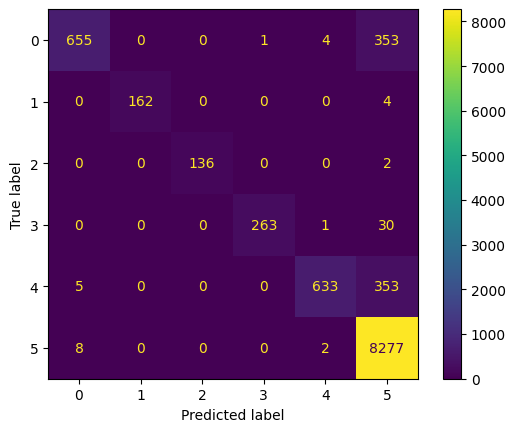

In [159]:
xg_cnf_train = ConfusionMatrixDisplay(xg_cmf_train)
xg_cnf_train.plot()

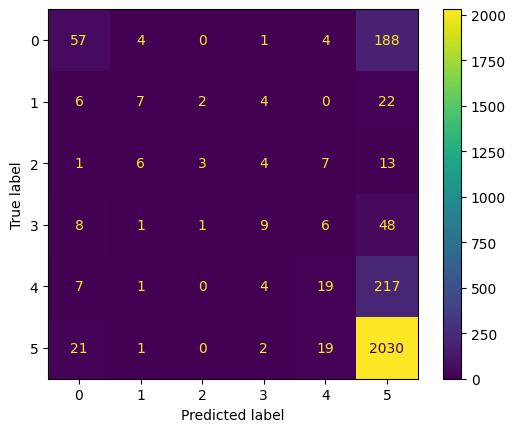

In [160]:
xg_cnf_validate = ConfusionMatrixDisplay(xg_cmf_val)
xg_cnf_validate.plot()

Observation:
1. Training_score=0.9291 and validation_score=0.7785. So Model is overfit Here on training data.
2. Classification report for validation data : Rating-1,2,3,4 have poor precision,recall and F1-score.
3. Confusion matrix for train data:  358 actual label are 0 but model predicted as Label-5. 
4. Confusion Matrix for validation data: Model correctly predicted majority rating-5 from recipe review.

## 14. Bagging Classifier

#### 14.1 Bagging Classifier

In [161]:
B1_classifier = BaggingClassifier(n_jobs=-1,random_state=42)
B1_classifier.fit(finalX_train, y_train)

BaggingClassifier(n_jobs=-1, random_state=42)

In [162]:
bg_y_hat_train=B1_classifier.predict(finalX_train)
bg_y_hat_val=B1_classifier.predict(finalX_val)

In [163]:
bg_train_score = ac(bg_y_hat_train, y_train)
bg_val_score = ac(bg_y_hat_val, y_val)
print(f'Training score: {bg_train_score}, Validation score: {bg_val_score}')

Training score: 0.987785838920011, Validation score: 0.7679030481087037


#### 14.1.2 Classification Report

In [164]:
#Bg_val_score_cr=cr(y_val,bg_y_hat_val)
#print(f'val score:{Bg_val_score_cr}')

#### 14.1.3 Confusion Matrix

In [165]:
Bg_cmf_train=cm(y_train,bg_y_hat_train)
Bg_cmf_val=cm(y_val,bg_y_hat_val)

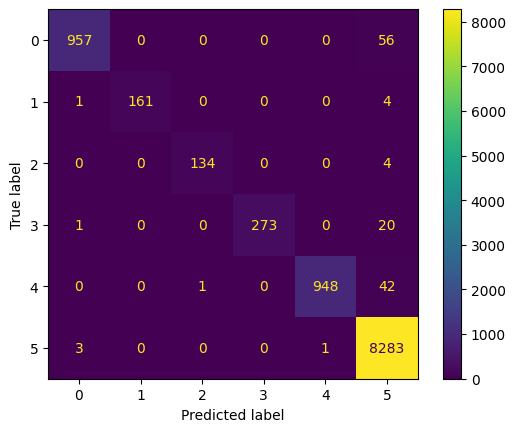

In [166]:
Bg_cnf_train = ConfusionMatrixDisplay(Bg_cmf_train)
Bg_cnf_train.plot()

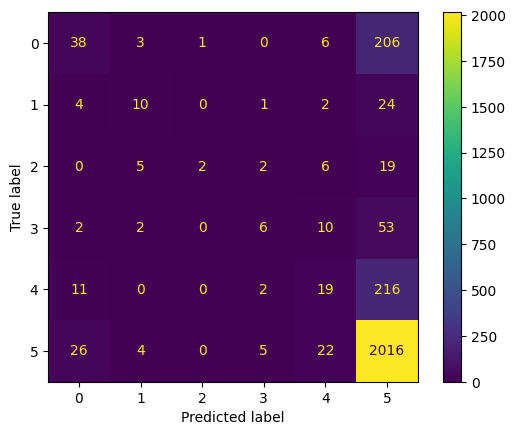

In [167]:
Bg_cnf_validate = ConfusionMatrixDisplay(Bg_cmf_val)
Bg_cnf_validate.plot()

Observation:
1. Training_score=0.9849 and validation_score=0.7708. So Model is overfit Here on training data.
2. Classification report for validation data : Rating-2,3,4 have poor precision,recall and F1-score.
3. Confusion matrix for train data: 358 actual label are 0 but model predicted as Label-5.
4. Confusion Matrix for validation data: Model correctly predicted majority rating-5 from recipe review.

### 14.2 Bagging Classifier with Hyper paramter tuning.

In [168]:
tuned_parameters = [{"n_estimators": [100,300,500,600], "max_samples" : [50,100,150],
                   "bootstrap" : [True,False],"max_features":[50,100,150]}]

b1_classifier=BaggingClassifier(random_state=42,n_jobs=-1)
b1_model = RandomizedSearchCV(estimator=b1_classifier,param_distributions=tuned_parameters,n_jobs=-1)
b1_model.fit(finalX_train,y_train)
print ("The best parameter value is:",b1_model.best_params_)

The best parameter value is: {'n_estimators': 100, 'max_samples': 50, 'max_features': 150, 'bootstrap': True}


In [169]:
bg_classifier_rs = BaggingClassifier(n_estimators=500,max_samples=150,max_features=100,
                                     bootstrap=True,random_state=42,n_jobs=-1)
bg_classifier_rs.fit(finalX_train, y_train)

BaggingClassifier(max_features=100, max_samples=150, n_estimators=500,
                  n_jobs=-1, random_state=42)

In [170]:
Bg_y_hat_train=bg_classifier_rs.predict(finalX_train)
Bg_y_hat_val=bg_classifier_rs.predict(finalX_val)

In [171]:
Bgr_train_score = ac(Bg_y_hat_train, y_train)
Bgr_validation_score = ac(Bg_y_hat_val, y_val)
print(f'Training score: {Bgr_train_score}, Validation score: {Bgr_validation_score}')

Training score: 0.7610432546606667, Validation score: 0.7612926918839515


#### 14.2.1 Classification Report

In [172]:
#Bg_val_score_cr=cr(y_val,Bg_y_hat_val)
#print(f'val score:{Bg_val_score_cr}')

#### 14.2.2 Confusion Matrix

In [173]:
bg_cmf_train=cm(y_train,Bg_y_hat_train)
bg_cmf_val=cm(y_val,Bg_y_hat_val)

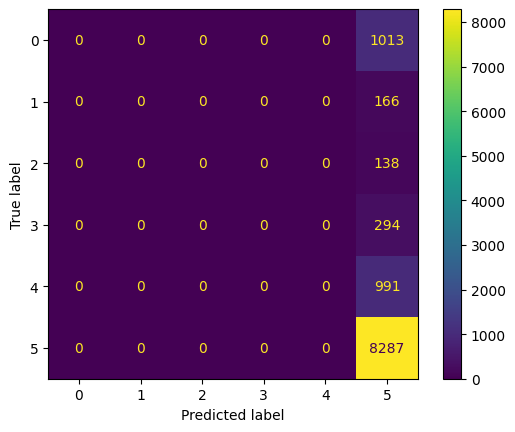

In [174]:
bg_cnf_train = ConfusionMatrixDisplay(bg_cmf_train)
bg_cnf_train.plot()

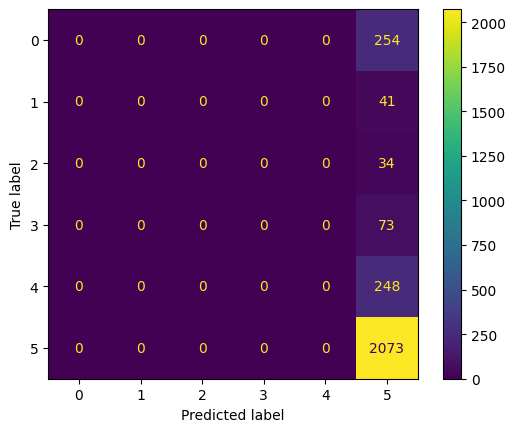

In [175]:
bg_cnf_validate = ConfusionMatrixDisplay(bg_cmf_val)
bg_cnf_validate.plot()

Observation:
1. The best parameter value is: {'n_estimators': 500, 'max_samples': 150, 'max_features': 100, 'bootstrap': True}
2. Training_score=0.7610 and validation_score=0.7612.
3. Classification report for validation data : Rating-5 have good precision,recall and F1-score.
4. Confusion matrix for train data: Model correctly predicted all rating from recipe-review.
5. Confusion Matrix for validation data: Model correctly predicted rating-5 from recipe-review.

## 15. Stacking classifier

### 15.1 Stacking Claaifier 

In [176]:
from sklearn.ensemble import StackingClassifier

In [177]:
estimators =[
     ('Lr',LogisticRegression(penalty="l2",solver='lbfgs',max_iter=5000,random_state=0)),
    ('Rf_class',RandomForestClassifier(max_features="sqrt",bootstrap=False,random_state=0)),
    ("knn",KNeighborsClassifier(n_neighbors=10)),
    ("SVM",SVR(kernel="rbf")),
    ("Lclf",lgb.LGBMClassifier(random_state=0)),
     ("Bagging",BaggingClassifier(n_jobs=-1,random_state=0))]

In [178]:
clf = StackingClassifier(estimators=estimators,
                         final_estimator=LogisticRegression(max_iter=5000,n_jobs=-1))
clf.fit(finalX_train,y_train)

StackingClassifier(estimators=[('Lr',
                                LogisticRegression(max_iter=5000,
                                                   random_state=0)),
                               ('Rf_class',
                                RandomForestClassifier(bootstrap=False,
                                                       random_state=0)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('SVM', SVR()),
                               ('Lclf', LGBMClassifier(random_state=0)),
                               ('Bagging',
                                BaggingClassifier(n_jobs=-1, random_state=0))],
                   final_estimator=LogisticRegression(max_iter=5000, n_jobs=-1))

In [179]:
clf_y_hat_train=clf.predict(finalX_train)
clf_y_hat_val=clf.predict(finalX_val)

In [180]:
clf_train_score = ac(clf_y_hat_train, y_train)
clf_val_score = ac(clf_y_hat_val, y_val)
print(f'Training score: {clf_train_score}, Validation score: {clf_val_score}')

Training score: 0.9874184957296354, Validation score: 0.7914065369078223


#### 15.2 Classification Report

In [181]:
#clf_val_score_cr=cr(y_val,clf_y_hat_val)
#print(f'val score:{clf_val_score_cr}')

#### 15.3 Confusion Matrix

In [182]:
clf_cmf_train=cm(y_train,clf_y_hat_train)
clf_cmf_val=cm(y_val,clf_y_hat_val)

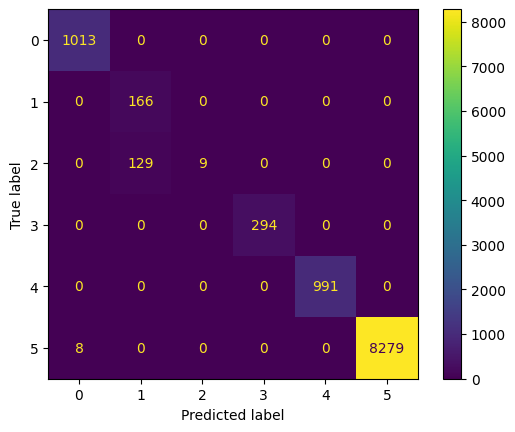

In [183]:
clf_cnf_train = ConfusionMatrixDisplay(clf_cmf_train)
clf_cnf_train.plot()

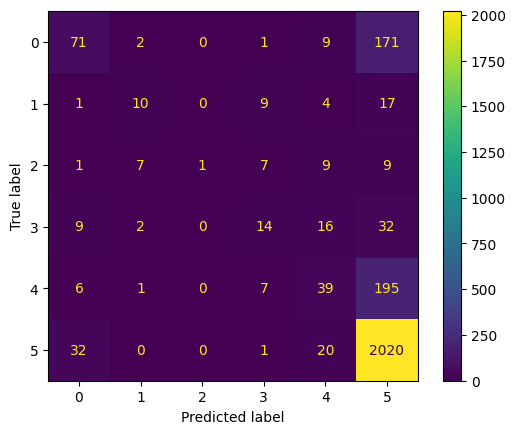

In [184]:
clf_cnf_validate = ConfusionMatrixDisplay(clf_cmf_val)
clf_cnf_validate.plot()

Observation:

1. Training_score=0.9796 and validation_score=0.7873. So Model is overfit Here on training data.
2. Classification report for validation data : Rating-2,3,4 have poor precision,recall and F1-score.
3. Confusion matrix for train data:  358 actual label are 0 but model predicted as Label-5. 
4. Confusion Matrix for validation data: Model correctly predicted majority rating-5 from recipe review.

## 15.Plot the Graph

In [185]:
models = np.array(["Logistics Regression","Logistics Regression(RS)","KNN","KNN_Tunned(RS)",
                  "Random_forest","Random_forest(RS)","LightBoost","LightBoost(RS)","XGBoost",
                   "Bagging","Bagging(RS)","Stacking"])

#Array having all accuracy scores
Accuracy_scores = np.array([Lr_val_score,lr_val_score,knn_val_score,knnr_val_score,
                            rf_val_score,rfr_val_score,Lf_val_score,lfr_validation_score,xg_val_score,
                            bg_val_score,Bgr_validation_score,clf_val_score])

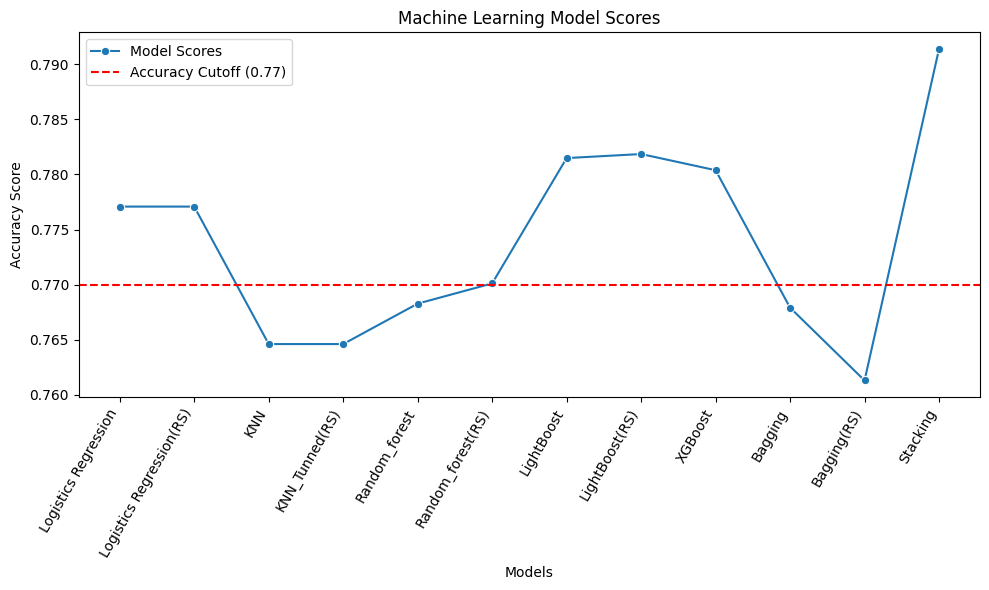

In [186]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=models, y=Accuracy_scores, marker='o', label='Model Scores')

#Plotting the cutoff line in red
cutoff=0.77
plt.axhline(y=cutoff, color='red', linestyle='--', label=f'Accuracy Cutoff ({cutoff})')

#Setting labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Machine Learning Model Scores')
plt.legend()
plt.xticks(rotation=60, ha='right')  # Rotate x-axis labels for better visibility

#Display the plot
plt.tight_layout()
plt.show()

## Highlights

1. Stacking classifier,XGBoost,LightGBM are best performing model.
2. Best hyper parameter for Light GBM classifier are:    {num_leaves=40,min_child_samples=30,max_depth=15,learning_rate=0.1,feature_fraction=0.9,bagging_fraction=1}
3. Best Hyper parameter for Random Forest classifier are :{'n_estimators': 100, min_samples_split': 6, 'max_features': 'sqrt', 'bootstrap': False}
4. Best Hyper parameter for Bagging classifier are :{'n_estimators': 500, max_samples=100, 'max_features': 100, 'bootstrap': False}
5. Best accuracy score achived is 0.80004

## Test data

## 1.Perfrom EDA and data visualization.

In [187]:
test_data.shape

(4546, 14)

In [188]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 4546 non-null   int64 
 1   RecipeNumber       4546 non-null   int64 
 2   RecipeCode         4546 non-null   int64 
 3   RecipeName         4546 non-null   object
 4   CommentID          4546 non-null   object
 5   UserID             4546 non-null   object
 6   UserName           4546 non-null   object
 7   UserReputation     4546 non-null   int64 
 8   CreationTimestamp  4546 non-null   int64 
 9   ReplyCount         4546 non-null   int64 
 10  ThumbsUpCount      4546 non-null   int64 
 11  ThumbsDownCount    4546 non-null   int64 
 12  BestScore          4546 non-null   int64 
 13  Recipe_Review      4546 non-null   object
dtypes: int64(9), object(5)
memory usage: 497.3+ KB


In [189]:
test_data.isnull().sum()

ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64

In [190]:
#For numerical column.
test_data.describe()

,ID,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,BestScore
count,4546.000000,4546.000000,4546.000000,4546.000000,4.546000e+03,4546.000000,4546.000000,4546.000000,4546.000000
mean,122.605147,38.884294,21736.701936,2.157501,1.623702e+09,0.014958,1.062253,0.566212,153.264848
std,116.006955,30.129333,24211.777711,9.797366,5.542652e+06,0.139922,4.303231,4.021903,141.355650
min,0.000000,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,12.000000
25%,46.000000,11.000000,6086.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,100.000000
50%,92.000000,32.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,100.000000
75%,154.000000,64.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,100.000000
max,715.000000,100.000000,191775.000000,520.000000,1.665669e+09,3.000000,106.000000,122.000000,931.000000


In [191]:
# For categorical column
test_data.describe(include="object")

,RecipeName,CommentID,UserID,UserName,Recipe_Review
count,4546,4546,4546,4546,4546
unique,100,4546,4060,4029,4510
top,Cheeseburger Soup,sp_aUSaElGf_41384_c_341929,u_1oKVeN9YNf07RT0P9R63Yu80P5A,JGa2595176,Very good!
freq,172,1,10,11,4


Observation:
1. test data size is (4546,14)
2. There are 10 colums having data type int64 and 5 columns having data type object.
3. In RecipeName cheeseburger Soup have highest frequency,In UserName JGa2595176 have highest frequency,In recipe_review Very good! word have highest frequency.

## 2 Columns 

#### 2.1 ID

In [192]:
print("Unique value:", pd.unique(test_data["ID"]))
print("No.of distnict values:", len(pd.unique(test_data["ID"])))

Unique value: [ 86 102 156  18  27  38 161 141 384  68  63  62   5  67  80 114 158 138
   8  58  49   1  61 101 142 223  41 133 188 309  87  25 154  84  17  32
  97 159 118  20 120 296 119 140  72 128  83  24  70  21 121 217 163  51
 175  26  82  29 205  59 174 168  81 150 125  30 136 113 117  23 323   4
 354 285  35 278 211 152  53 111 199  33  85 126   2  65  75  13  52  96
 222 590 404 467 353 155  12  66  42  77   6 198  19  34  36 110 604 572
 221 273 104 609  45 107 192  91 637  98 361 185 105 325 106   3 146 274
   0 103  22 405 164  73 466 139  46  88 157  55  92 149 135 200  39 283
 220  95  79  28 501 197  64 184 449  16 153  71 410  56 147 194 213   9
 190   7 244 238 527 122  69 359 207 508 130 288 183 108  57 336  89  10
 132 434 143 350 243 127 245  94 463  54  76 402 145  31  43 472 131 531
  47 398  60 162  40 367 345 148 176 478  48 319  37 124 318 253 289 270
 195 202  99  14 441  11 204  93 512 271 303 227 167  44 186 458 437 129
 482 123 170 134 166 248 346 203 428 

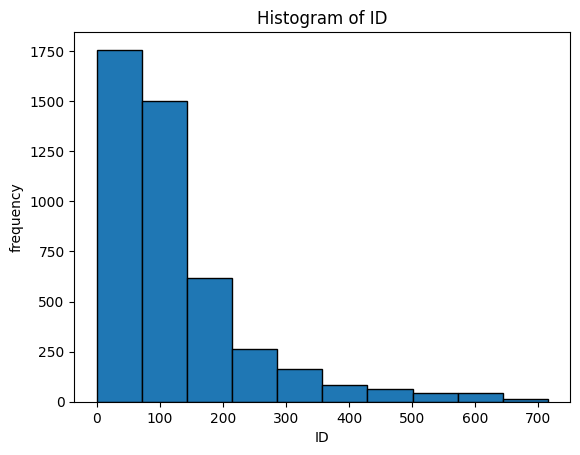

In [193]:
# To plot histogram.
plt.hist(test_data["ID"], bins=10,ec="black")
plt.xlabel("ID")
plt.ylabel("frequency")
plt.title("Histogram of ID")
plt.show()

Observation:

1. There are 525 unique vlaue in ID colum.
2. ID number 0 to 100 have highest frequency.
3. Data-Distribution is right-skewed.

#### 2.2 RecipeNumber

In [194]:
print("Unique value:", pd.unique(test_data["RecipeNumber"]))
print("No.of distnict values:", len(pd.unique(test_data["RecipeNumber"])))

Unique value: [ 45  53  89  70  29   5   2   3   7  35  33  40  66  44  23  59 100  82
  17  20  52  39  19  16   1  49  72   8  18  65   9  63  64  74  51  31
  96  67  62   4  10  15  41  46  58  95  24  27  81  83  93  37  69  55
  88   6  98  13  99  34  11  21  48  14  12  84  97  92  80  90  79  61
  94  77  28  36  73  25  50  47  54  32  78  43  26  71  22  38  68  56
  75  91  86  85  42  30  76  60  87  57]
No.of distnict values: 100


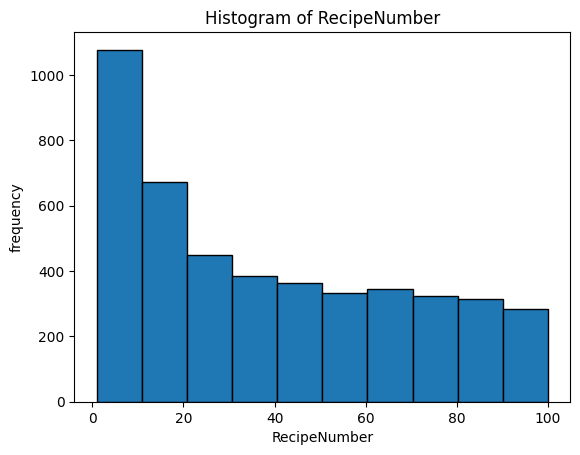

In [195]:
plt.hist(test_data["RecipeNumber"], bins=10, ec="black")
plt.xlabel("RecipeNumber")
plt.ylabel("frequency")
plt.title("Histogram of RecipeNumber")
plt.show()

Observation:
1. There are 100 distnict Recipenumber given to Recipe.
2. Recipe number between 0 to 10 have highest frequency.
3. The data-distribution is right-skewed.

#### 2.3 RecipeCode

In [196]:
print("Unique value:", pd.unique(test_data["RecipeCode"]))
print("No.of distnict values:", len(pd.unique(test_data["RecipeCode"])))

Unique value: [ 41384   3143   1324  32264   3058  42386   3309   2832  12540  27696
  32535   8431   7752  31278  14600    414  82745  18274  36450   6504
  27434  28058   1693  41101  14299  45495   1821   6086   2872  12347
  42083  24886  12700  26937   7539   7708   3290  16579   1152  17826
   2912  10252  35948  18345  32248  18341    957  43675  27626   9735
  42873  20170  39545  38550   8202  21444  11767  32480 191775  19201
  12003  33206   9739   7178  19731   4444  34347 141947  39581  33743
  33121  17022   8015  16458  12734   1196  41095  23222 100276  15805
  35766  17310  36217  33457    386  12259   1081   1063  74724  27675
  38183   3683   4383  39334  10248  39549  46655  11588  11330   9010]
No.of distnict values: 100


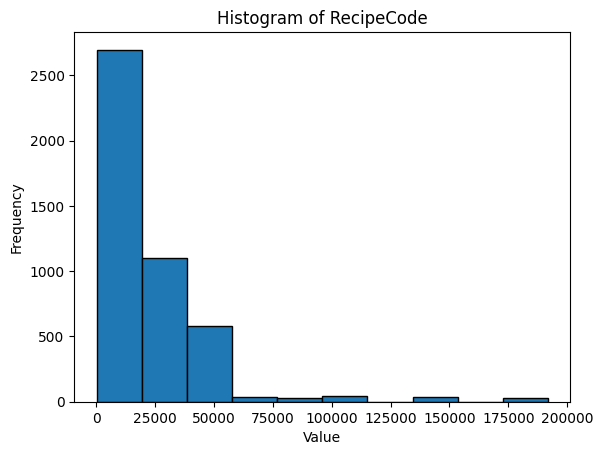

In [197]:
# To plot histogram.
plt.hist(test_data["RecipeCode"], bins=10, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of RecipeCode')
plt.show()

Observation: 
1. There are 100 unique values in Recipe code.
2. The Data-distribution is right-skewed.

#### 2.4 RecipeName

In [198]:
recipe_frequency = test_data['RecipeName'].value_counts()
recipe_frequency

RecipeName
Cheeseburger Soup            172
Creamy White Chili           171
Best Ever Banana Bread       137
Enchilada Casser-Ole!        108
Flavorful Chicken Fajitas     94
                            ... 
Caramel Heavenlies            22
Easy Chicken Enchiladas       21
Lime Chicken Tacos            21
Chunky Apple Cake             20
Vegetarian Linguine           12
Name: count, Length: 100, dtype: int64

In [199]:
print("No.of distnict values:", len(pd.unique(test_data["RecipeName"])))

No.of distnict values: 100


Observation:

1. There are 100 distinct values in recipeName.
2. Cheeseburger Soup have highest frequency and Vegetarian Linuguine have lowest frequency.

#### 2.5 CommentID

In [200]:
print("No.of distnict values:", len(pd.unique(test_data["CommentID"])))

No.of distnict values: 4546


In [201]:
Comment = test_data['CommentID'].value_counts()
Comment

CommentID
sp_aUSaElGf_41384_c_341929                         1
sp_aUSaElGf_32248_c_405533                         1
sp_aUSaElGf_14299_c_174536                         1
sp_aUSaElGf_9735_c_2F2ygSDfXXzZsV5BO5fRCborSF0     1
sp_aUSaElGf_36450_c_1rDUiRzgG7ENhu4gUCT6FyAJiuL    1
                                                  ..
sp_aUSaElGf_19731_c_23TXz9jTjfhKH3bZoAYqznA9YYh    1
sp_aUSaElGf_6086_c_151043                          1
sp_aUSaElGf_414_c_408499                           1
sp_aUSaElGf_1693_c_145679                          1
sp_aUSaElGf_42873_c_113484                         1
Name: count, Length: 4546, dtype: int64

Observation:
1. There are 4546 unique CommentID.

#### 2.6 UserID

In [202]:
print("Unique value:",pd.unique(test_data["UserID"]))
print("No.of distnict values:",len(pd.unique(test_data["UserID"])))

Unique value: ['u_1oKc4U6bh65cEli8Z8eTIf98Vpr' 'u_1oKW5seFLQMSwAeOfBVmwJizy5D'
 'u_1oKZ6GUIAIol8xe6oEI7t1Mpxdz' ... 'u_1oKVb3oC9QR5uDI8OqeaPncMtBe'
 'u_1oKcs7T7xAY63ZrRKCwH8ccshww' 'u_1oKVnzyJyDQtTpG0U7QQIHaw5o2']
No.of distnict values: 4060


In [203]:
userID = test_data['UserID'].value_counts()
userID

UserID
u_1oKVeN9YNf07RT0P9R63Yu80P5A    10
u_1oKVZzipo1u8lcqQzDUcw4UBn9e     8
u_1oKVa5FSx8thvFfGGM6whXv482h     7
u_1oKVZxAOR5BEzyF4H6ENc7jwfUW     7
u_1oKViYcsgLsMPuJqQWcDav8rnWB     7
                                 ..
u_1oKZaJ2b2GWYvnOp9feFAzpHY5U     1
u_1oKXSiXIILHVgKuZZVrsLYAILBd     1
u_1oKalTuCSNXi062uDCqOjFH9lGE     1
u_1oKdRZx7MMaBa6fxhcEUtjJypHl     1
u_1oKVnzyJyDQtTpG0U7QQIHaw5o2     1
Name: count, Length: 4060, dtype: int64

Observation:
1. There are 10783 distinct userID.
2. User_id u_1oKVeN9YNf07RT0P9R63Yu80P5A have highest comment.

#### 2.7 UserReputation

In [204]:
print("Unique value:",pd.unique(test_data["UserReputation"]))
print("No.of distnict values:",len(pd.unique(test_data["UserReputation"])))

Unique value: [  1  20  10  30   0  80  70  40 100  60 130  50 170 520]
No.of distnict values: 14


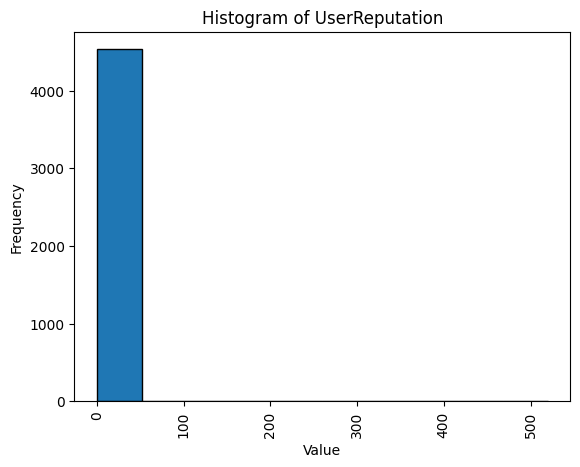

In [205]:
# To plot histogram.
plt.hist(test_data["UserReputation"],edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of UserReputation')
plt.xticks(rotation='vertical')
plt.show()

Observation:

1. There are 14 unique value in UserReputation.
2. max value of UserReputation is 520 and min vlaue of UserReputation is 1.

#### 2.8 CreationTimestamp

In [206]:
print("Unique value:",pd.unique(test_data["CreationTimestamp"]))
print("No.of distnict values:",len(pd.unique(test_data["CreationTimestamp"])))

Unique value: [1622718043 1622717685 1622718307 ... 1656802199 1664137547 1622717941]
No.of distnict values: 1688


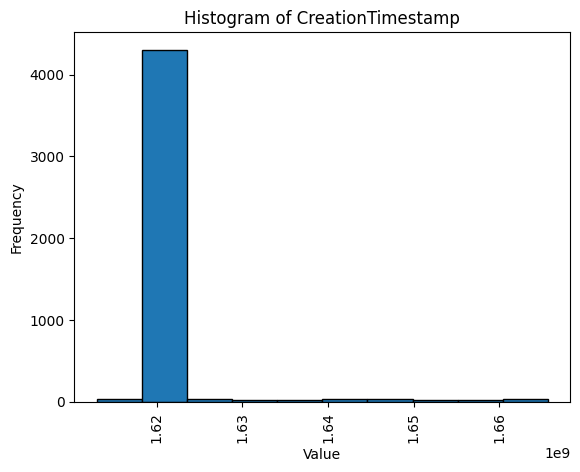

In [207]:
# To plot histogram.
plt.hist(test_data["CreationTimestamp"], bins=10, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of CreationTimestamp')
plt.xticks(rotation='vertical')
plt.show()

Observation:
1. There are 1688 unique values present in CreationTimeStamp.

#### 2.9 ReplyCount

In [208]:
print("Unique value:", pd.unique(test_data["ReplyCount"]))
print("No.of distnict values:", len(pd.unique(test_data["ReplyCount"])))

Unique value: [0 1 2 3]
No.of distnict values: 4


In [209]:
test_data["ReplyCount"].value_counts()

ReplyCount
0    4488
1      49
2       8
3       1
Name: count, dtype: int64

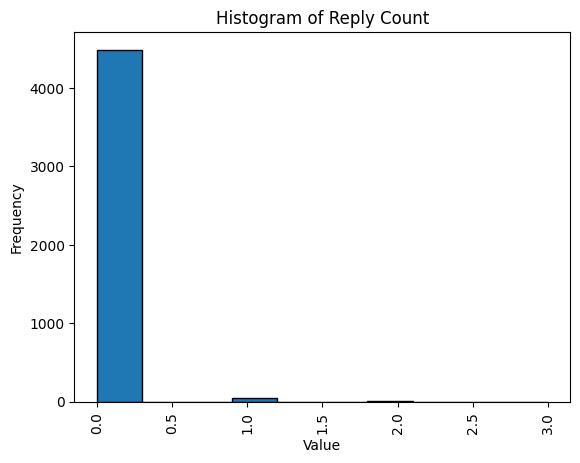

In [210]:
# To plot histogram.
plt.hist(test_data["ReplyCount"],edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Reply Count')
plt.xticks(rotation='vertical')
plt.show()

Observation:
1. There are 4 unique value in reply count.
2. Reply Count zero have highest frequency.

#### 2.10 ThumbsUpCount

In [211]:
print("Unique value:",pd.unique(test_data["ThumbsUpCount"]))
print("No.of distnict values:",len(pd.unique(test_data["ThumbsUpCount"])))

Unique value: [  0   4   1  10   3   5   2   9  23   6   7  29  12  13  60  27  40  48
  11  24  37  76   8  34  18  20  30  15  17  26  36  42  21  14  19  16
  55  51 106  41  28  45  33  38  22  59]
No.of distnict values: 46


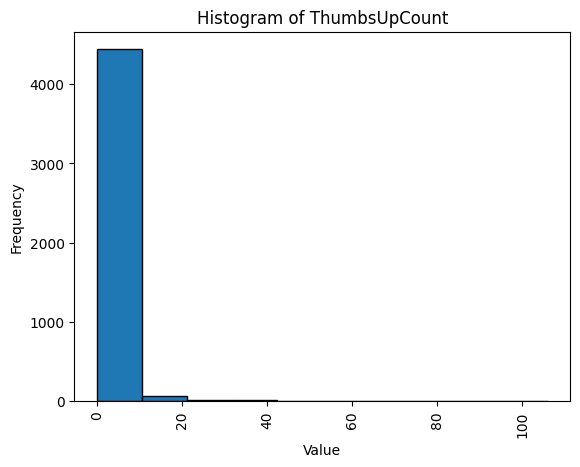

In [212]:
# To plot histogram.
plt.hist(test_data["ThumbsUpCount"],bins=10,edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of ThumbsUpCount')
plt.xticks(rotation='vertical')
plt.show()

Observation:
1. There are 46 distnict value in ThumbsUpCount.
2. Min value is 0 for ThumbsUpCount and Max value is 106 for thumbsUpCount.

#### 2.11 ThumbsDownCount

In [213]:
print("Unique value:", pd.unique(test_data["ThumbsDownCount"]))
print("No.of distnict values:", len(pd.unique(test_data["ThumbsDownCount"])))

Unique value: [  0   1   3   7   2   6  12   5  33  25   4 109 112  15  13  11   9  27
  18  22  32   8  17  16  37  28  19  34  46  20  10  24  14  71 122  26
  69  23]
No.of distnict values: 38


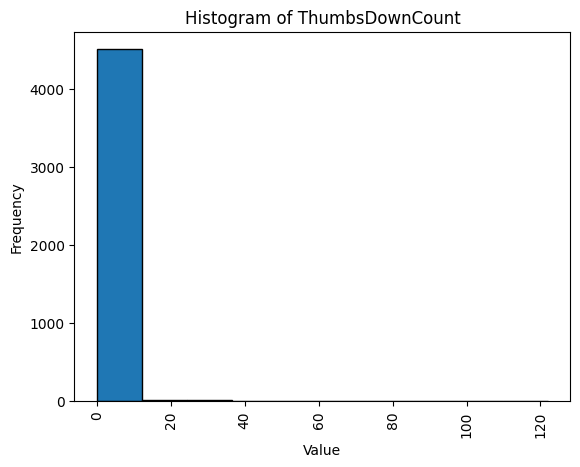

In [214]:
# To plot histogram.
plt.hist(test_data["ThumbsDownCount"],edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of ThumbsDownCount')
plt.xticks(rotation='vertical')
plt.show()

Observation:
1. There are 38 Distinict value in ThumbDownCount.
2. Min value is 0 and Max value is 122.

#### 2.12 BestScore

In [215]:
print("Unique value:",pd.unique(test_data["BestScore"]))
print("No.of distnict values:",len(pd.unique(test_data["BestScore"])))
print("Minimum value:",test_data["BestScore"].min())
print("Maximum value:",test_data["BestScore"].max())

Unique value: [100 212 193 824 611 787 329 148 625 253 235 368 813 297 120 759 296 615
 771 184 390 718 374 311 640 142 812 521 825 107  16 901 727 493 738 507
 887 284 829 471 327 127 523 653 763 724 631 206 303 706 782 316 684 169
 185 203 885 424 440 729 709 659 495 290 167 607 603 798 688 708 196 114
 869 614 773 619 823 459 404 370 320 454 721 723 131 168 354 806 781 928
 793 674 584 769 868 116 695 794 456 809 612 877 734 136 909 261 578 795
 532 774 856 585 102 143 433 819 400 791 639 842 481 319 617 399 125 750
 447 171 220 761 153 744 344 699 113 145 715 504 518 858 679 870 693 118
 483 606 831 274 780 687 421 743 388 506 725 269 694 649 713 415 163 655
 509 764 692 770 502 246 347 517 805 529 372 667 790 814 508 335 786 287
 566 797 356 534 690 519 711 720 467 304 701 514 106 637 524 380 501 403
 262  12 431 822 482 360 332 530 753 867 741 672 275 627 609 109 367 188
 815 857 457 549 496 395 804 717 621 426 789 299 735 826 123 766 259 647
 577 837 526 310 498 338 596 651 820 

In [216]:
test_data["BestScore"].value_counts()

BestScore
100    3496
193     375
253      84
142      54
297      47
       ... 
447       1
761       1
744       1
344       1
834       1
Name: count, Length: 275, dtype: int64

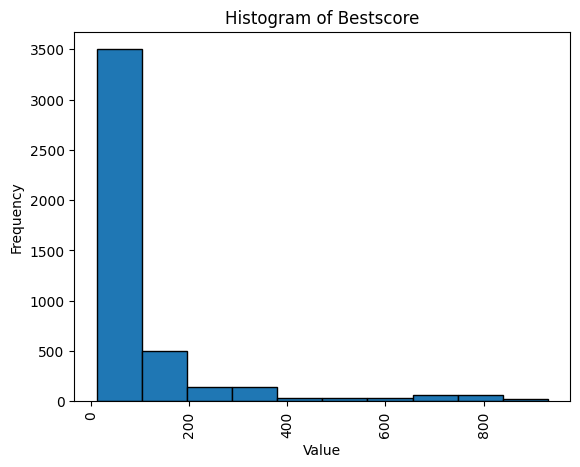

In [217]:
# To plot histogram.
plt.hist(test_data["BestScore"],edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Bestscore')
plt.xticks(rotation='vertical')
plt.show()

Observation:
1. There are 275 unique value in Best score.
2. The min value is 12 and Max value is 931.
3. The Data distribution is Right-skewed.

## 3. Drop unnecessary columns.

In [218]:
#new_data=test_data.drop(["CommentID","UserID"], axis=1)

In [219]:
#new_data.shape

## 4. Feature engineering.

In [220]:
#Extract the year,month,day,day of week, datetime and hour from Creation time stamp.
test_data['Year'] = pd.to_datetime(test_data['CreationTimestamp'], unit='s').dt.year
test_data['Month'] = pd.to_datetime(test_data['CreationTimestamp'], unit='s').dt.month
test_data['Day'] = pd.to_datetime(test_data['CreationTimestamp'], unit='s').dt.day
test_data['DayOfWeek'] = pd.to_datetime(test_data['CreationTimestamp'], unit='s').dt.strftime("%A")
test_data['datetime'] = pd.to_datetime(test_data['CreationTimestamp'], unit='s').dt.time
test_data["Hour"]=pd.to_datetime(test_data["CreationTimestamp"],unit="s").dt.hour

In [221]:
#Categorize the day into morning,afternoon,evening and night.
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 13 <= hour <18 :
        return 'Afternoon'
    elif 18<= hour< 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column 'TimeOfDay'
test_data['TimeOfDay'] = test_data['Hour'].apply(categorize_hour)

In [222]:
#Categorize the week into weekend and weekday.
def categorize_day(day):
    if day in ["Saturday","Sunday"]:
        return 1
    else:
        return 0 

# Apply the function to create a new column 'TimeOfDay'
test_data['weekend'] = test_data['DayOfWeek'].apply(categorize_day)

In [223]:
#Higher Reputation column
test_data["Weightedvote"]=(1*test_data["ThumbsUpCount"])+((-1)*test_data["ThumbsDownCount"])

In [224]:
test_data["HigherReputation"]=test_data["UserReputation"]*(test_data["ThumbsUpCount"]+test_data["ThumbsDownCount"])

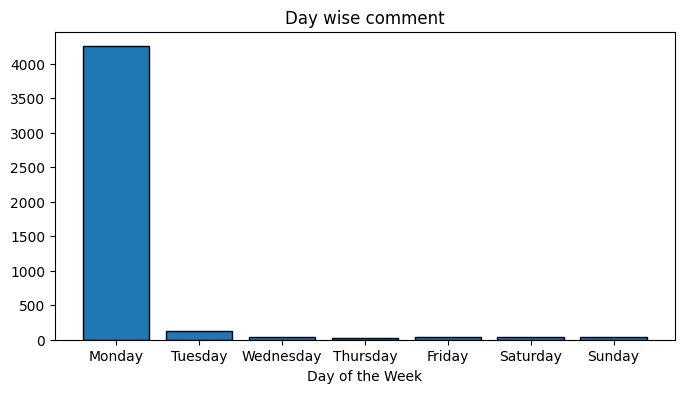

In [225]:
# To plot histogram of DayOf week column.
plt.figure(figsize=(8,4))
plt.hist(test_data['DayOfWeek'], bins=7, range=[0, 7], align='left', rwidth=0.8,edgecolor='black')
plt.title('Day wise comment')
plt.xlabel('Day of the Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

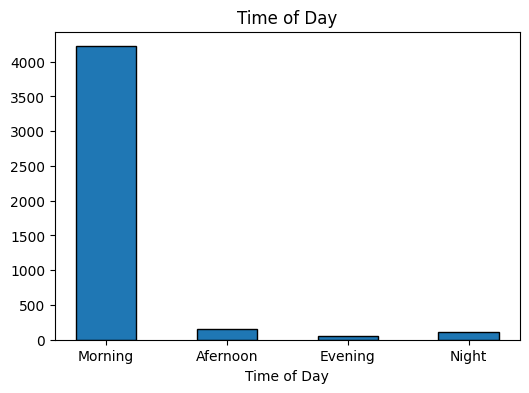

In [226]:
#To plot histogram of TimeOfDay column.
plt.figure(figsize=(6,4))
plt.hist(test_data['TimeOfDay'], bins=4, range=[0, 4], align='left', rwidth=0.5,edgecolor='black')
plt.title('Time of Day')
plt.xlabel('Time of Day')
plt.xticks(range(4), ['Morning', 'Afernoon', 'Evening', 'Night'])
plt.show()

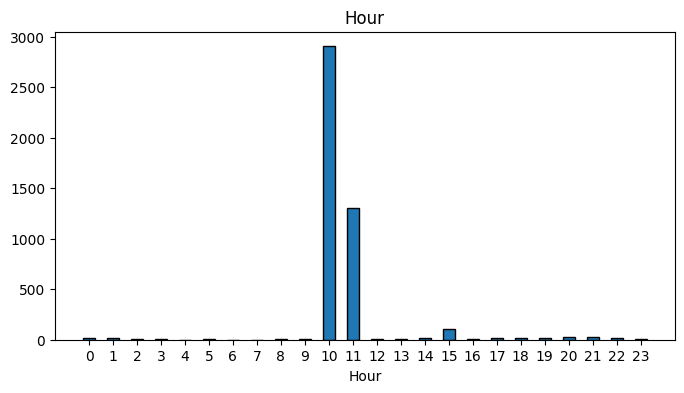

In [227]:
# To plot histogram of hour column.
plt.figure(figsize=(8,4))
plt.hist(test_data['Hour'], bins=24, range=[0, 24], align='left', rwidth=0.5,edgecolor='black')
plt.title('Hour')
plt.xlabel('Hour')
plt.xticks(range(24))
plt.show()

In [228]:
#Drop CreationTimestamp and date time columns.
finalX=test_data.drop(["CreationTimestamp","datetime"],axis=1)

In [229]:
X_test_mix=finalX.drop(["Recipe_Review","CommentID"],axis=1)

In [230]:
X_test_text=finalX[["Recipe_Review","CommentID"]]

## 5. Apply Scaling.

### 5.1 Apply transformation on X_test_mix.

In [231]:
X_test_processed= ct.transform(X_test_mix)

In [232]:
X_test_processed.shape

(4546, 125)

In [233]:
import re
def clean_text(text):
    # Convert &#39 to apostrophe
    text = text.replace('&#39;', "'")
    # Remove extra spaces and punctuation
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [234]:
X_test_text.loc[:,"Recipe_Review"]= X_test_text["Recipe_Review"].apply(clean_text)

In [235]:
X_test_text_vec1=tfidf1.transform(X_test_text["Recipe_Review"])

In [236]:
X_test_text_vec2=tfidf2.transform(X_test_text["CommentID"])

In [237]:
#X_test_text_vec3=tfidf3.transform(X_test_text["CommentID"])

In [238]:
X_test_text_vec=np.hstack([X_test_text_vec1.toarray(),X_test_text_vec2.toarray()])

In [239]:
# Combine the X_test_processed and X_test_text_vec using the hstack & print dimension
finalX_test= np.hstack([X_test_processed.toarray(),X_test_text_vec])
print(finalX_test.shape)

(4546, 20446)


## 6.Prediciton using the best performing model.

In [240]:
best_model_predict =clf.predict(finalX_test)
print(best_model_predict)

[5 5 0 ... 5 1 5]


## 7. To Generate CSV file.

In [241]:
res_len=len(best_model_predict)
id=np.array([i for i in range(1, res_len+1)])
result=pd.DataFrame({"ID":id,"total_amount":best_model_predict})
result.to_csv('submission.csv',index=False)